In [45]:
#importing package and libraries required for the project
import numpy as np
import pandas as pd
import os #fucntions for interacting with the operating systemm
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,explained_variance_score,mean_absolute_error,mean_squared_error
from math import sqrt

%matplotlib inline

In [3]:
#to change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

#increasing the size of sns plots
sns.set(rc={'figure.figsize':(5,5)})

#viewing all of data frame
pd.set_option('display.max_columns', None)

#removing warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Check List- All tentative packages required are imported and formatting preferences loaded

In [4]:
#Loading the data
car_raw_data=pd.read_csv('C:\\Users\\user\\Desktop\\Evarcity\\Car Price Prediction Assignment\\CarPrice_Assignment.csv')

In [5]:
#print the shape
print(car_raw_data.shape)

#Viewing the first 5 rows
car_raw_data.head()

(205, 26)


car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [6]:
#EDA 
#Investigating the columns of the raw data

for column in car_raw_data:
    unique_vals = np.unique(car_raw_data[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature car_ID :205
The number of values for feature symboling :6 -- [-2 -1  0  1  2  3]
The number of values for feature CarName :147
The number of values for feature fueltype :2 -- ['diesel' 'gas']
The number of values for feature aspiration :2 -- ['std' 'turbo']
The number of values for feature doornumber :2 -- ['four' 'two']
The number of values for feature carbody :5 -- ['convertible' 'hardtop' 'hatchback' 'sedan' 'wagon']
The number of values for feature drivewheel :3 -- ['4wd' 'fwd' 'rwd']
The number of values for feature enginelocation :2 -- ['front' 'rear']
The number of values for feature wheelbase :53
The number of values for feature carlength :75
The number of values for feature carwidth :44
The number of values for feature carheight :49
The number of values for feature curbweight :171
The number of values for feature enginetype :7 -- ['dohc' 'dohcv' 'l' 'ohc' 'ohcf' 'ohcv' 'rotor']
The number of values for feature cylindernumber :7 -- ['eight' 'fiv

In [7]:
#Checking if there any null values in columns
car_raw_data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

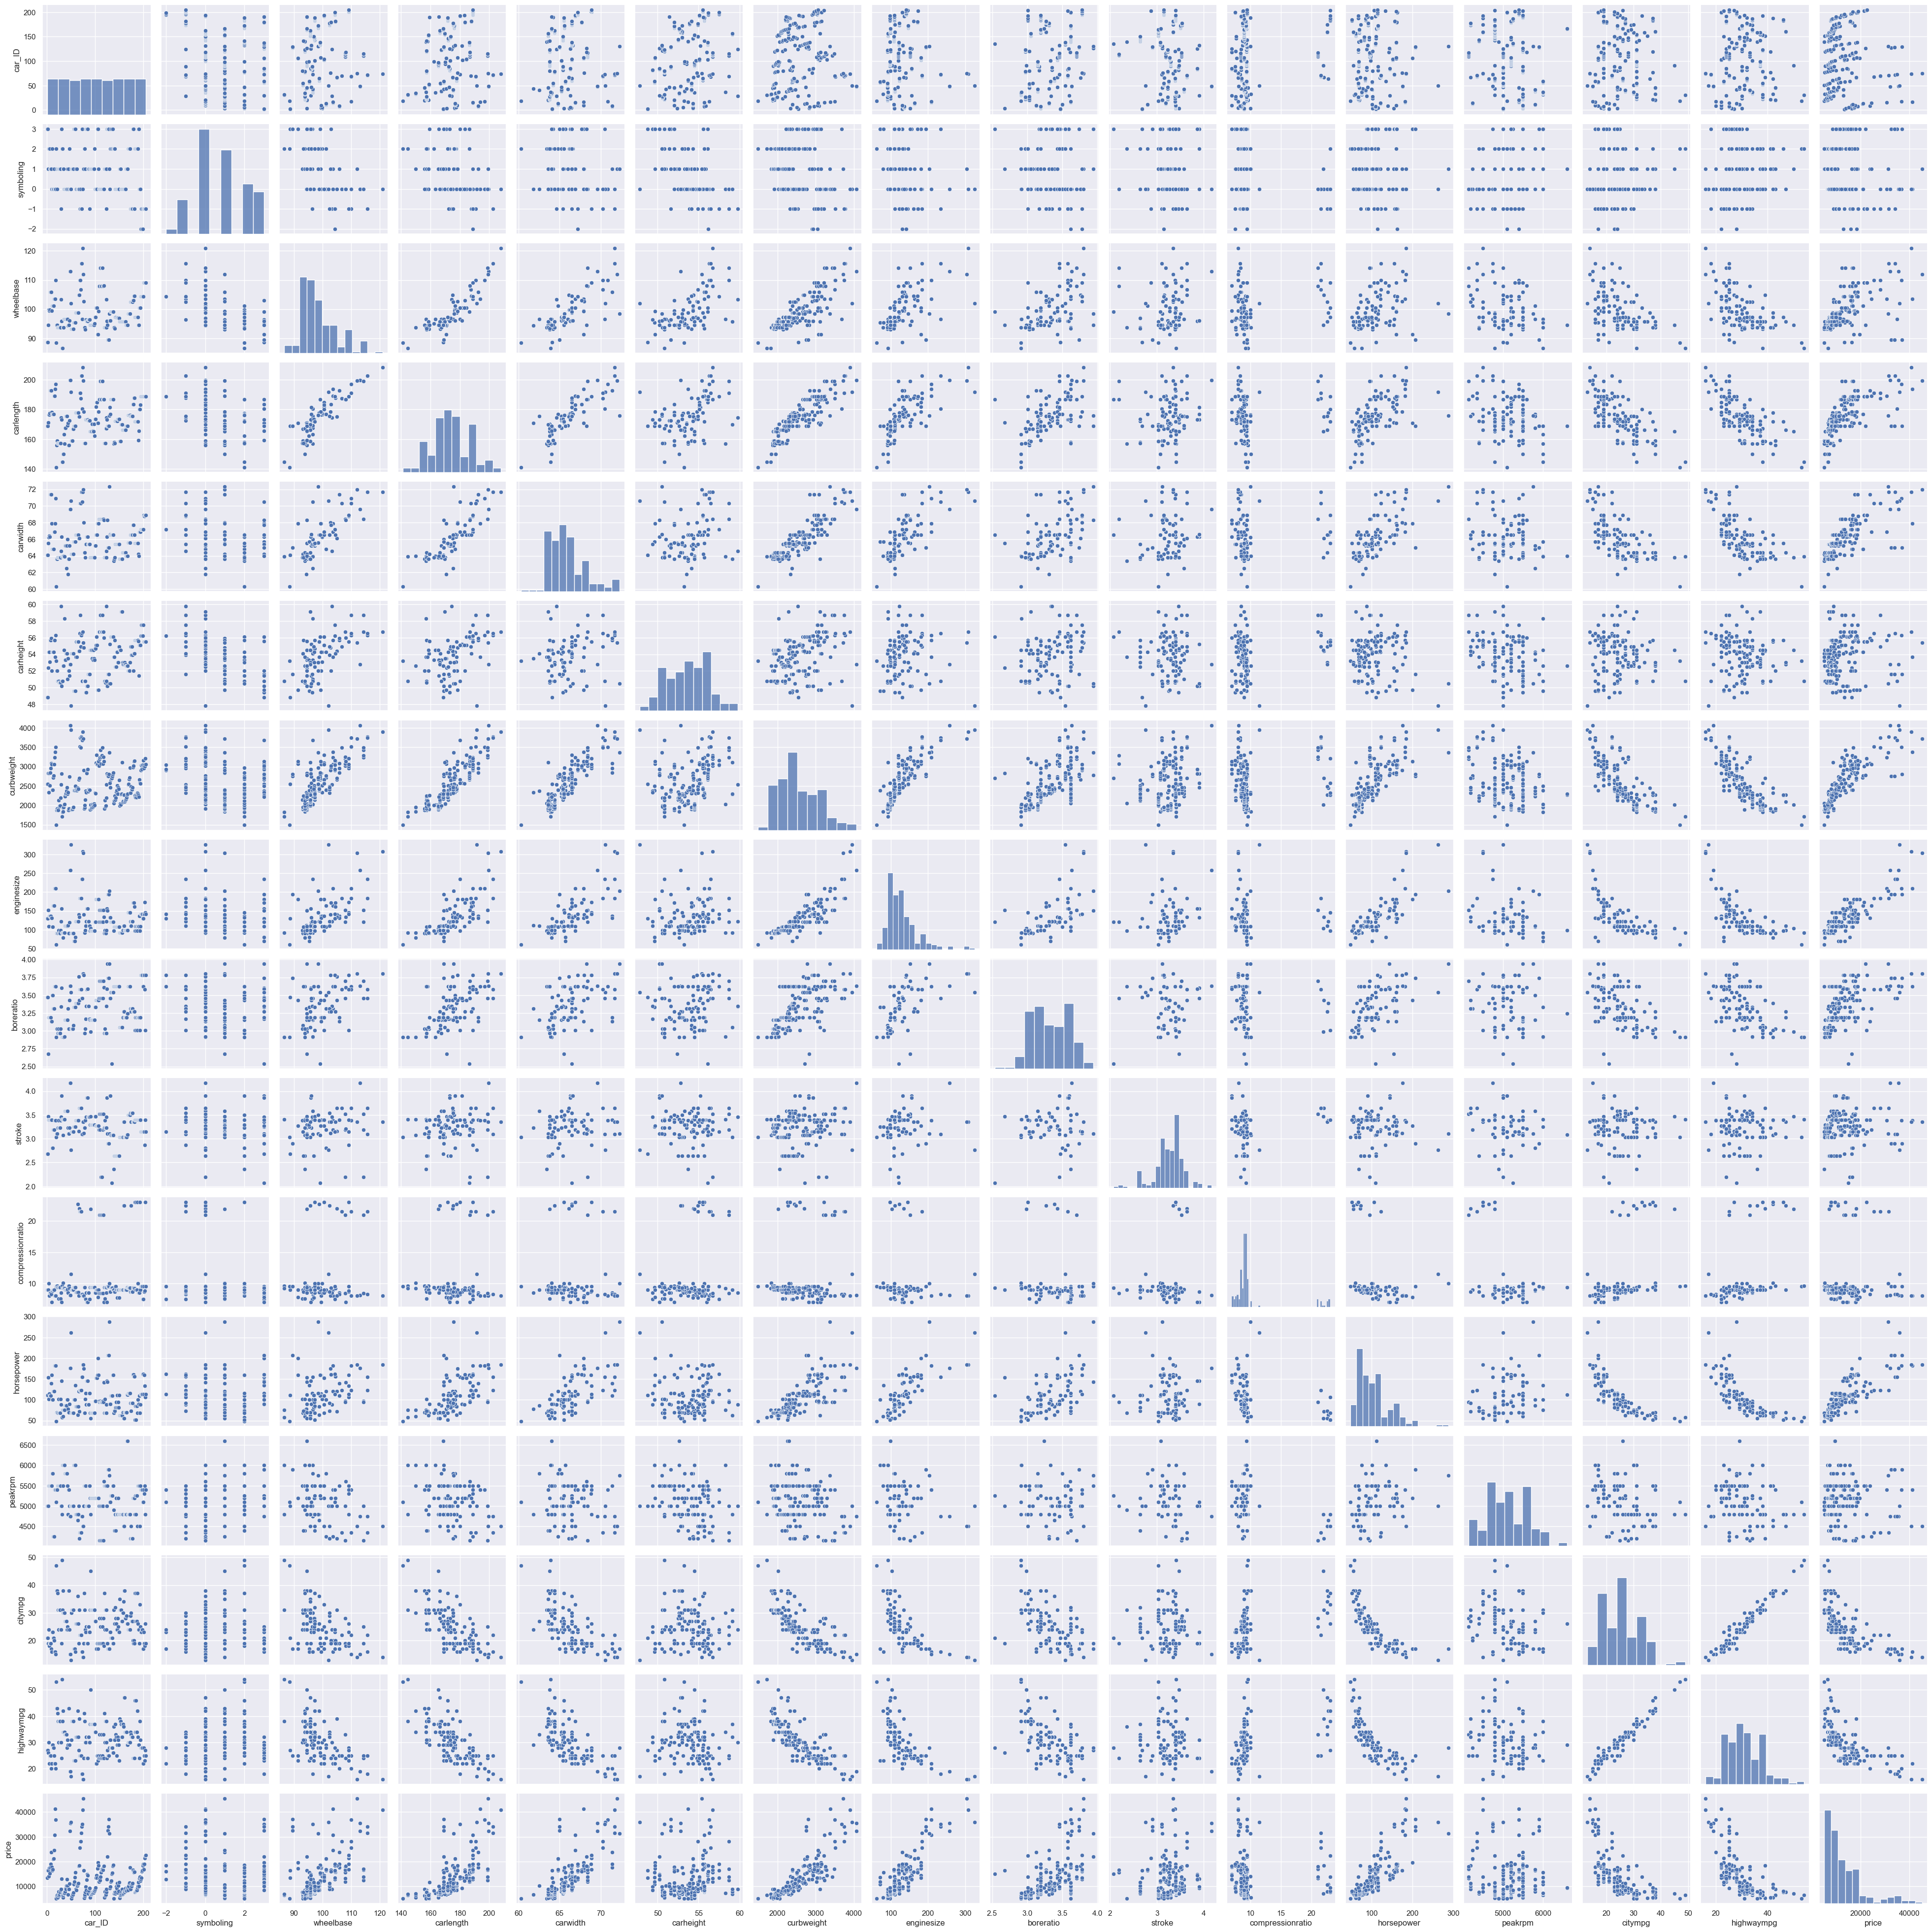

In [8]:
#Vizualization of the  entire data in pairplot and trying to find out relation w.r.t price using seaborn

g=sns.pairplot(car_raw_data)


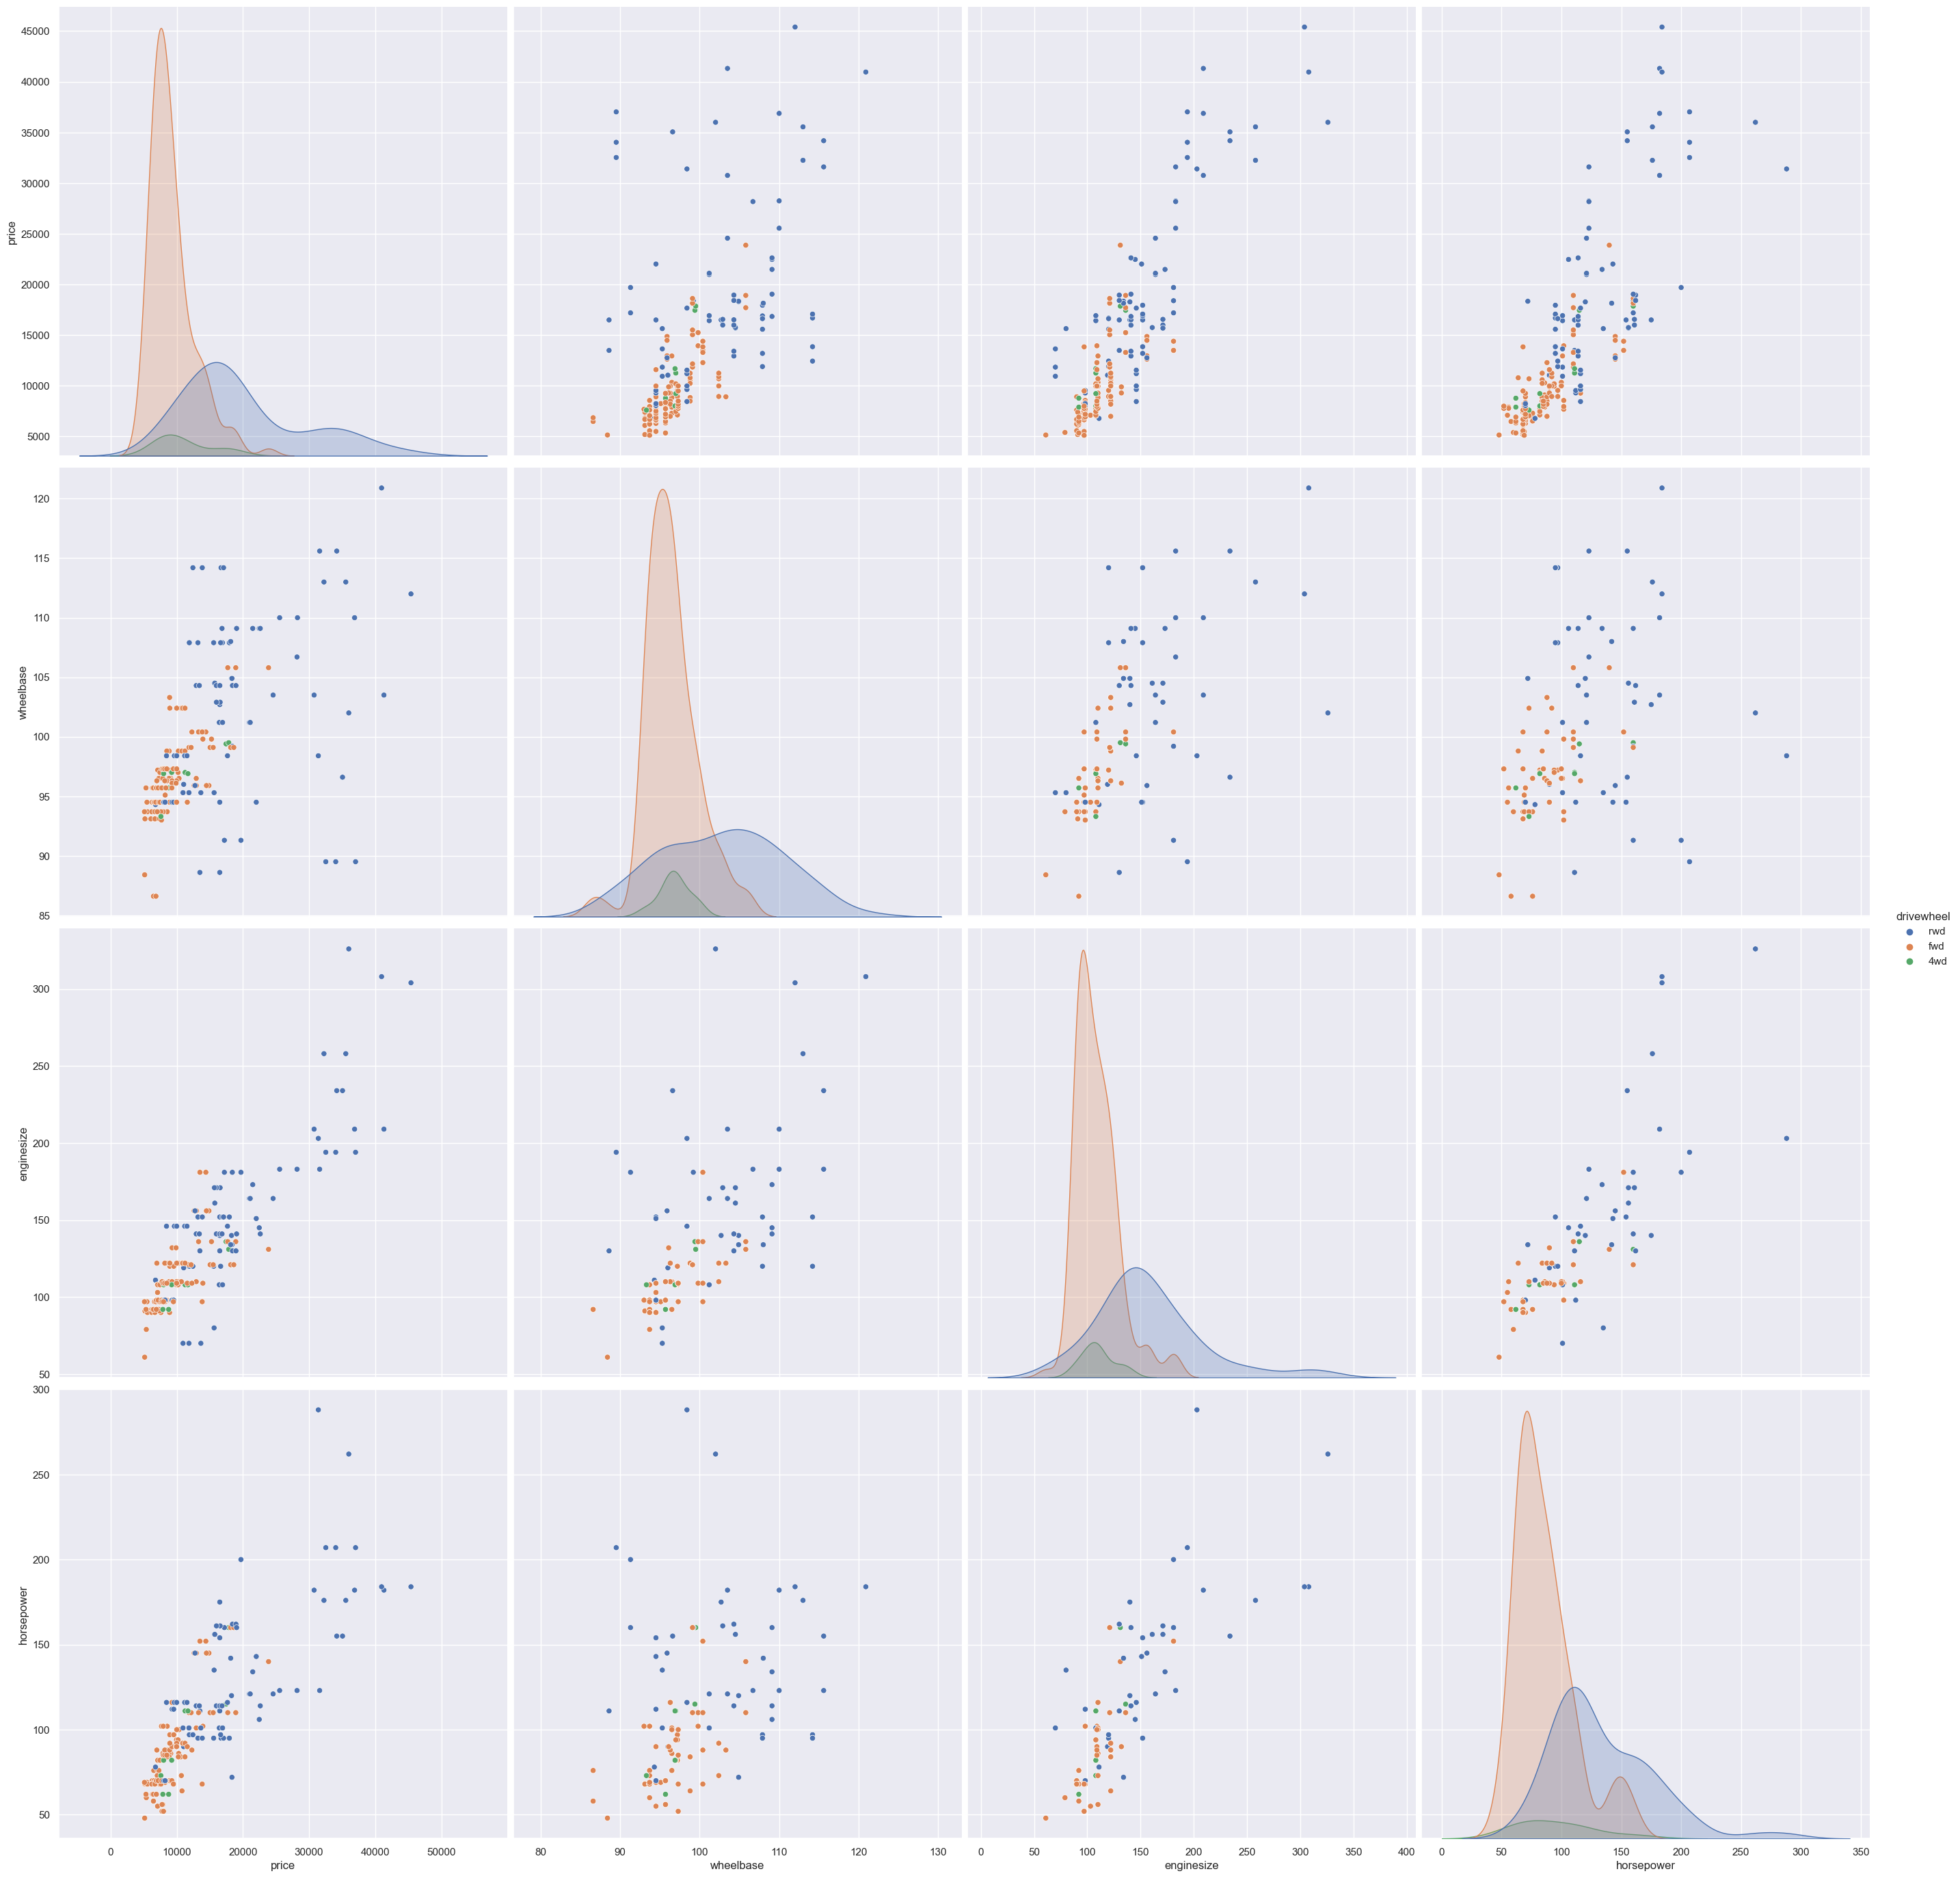

In [9]:
#We can make out in the last row some kind of correllation between price and some specfic column

#Vizualizing the subset raw data with some subset with important features - hue to be based on type of drivewheel as it is most common practice
g = sns.pairplot(car_raw_data[['price', 'wheelbase', 'enginesize','horsepower','drivewheel']], hue = 'drivewheel', height = 7)

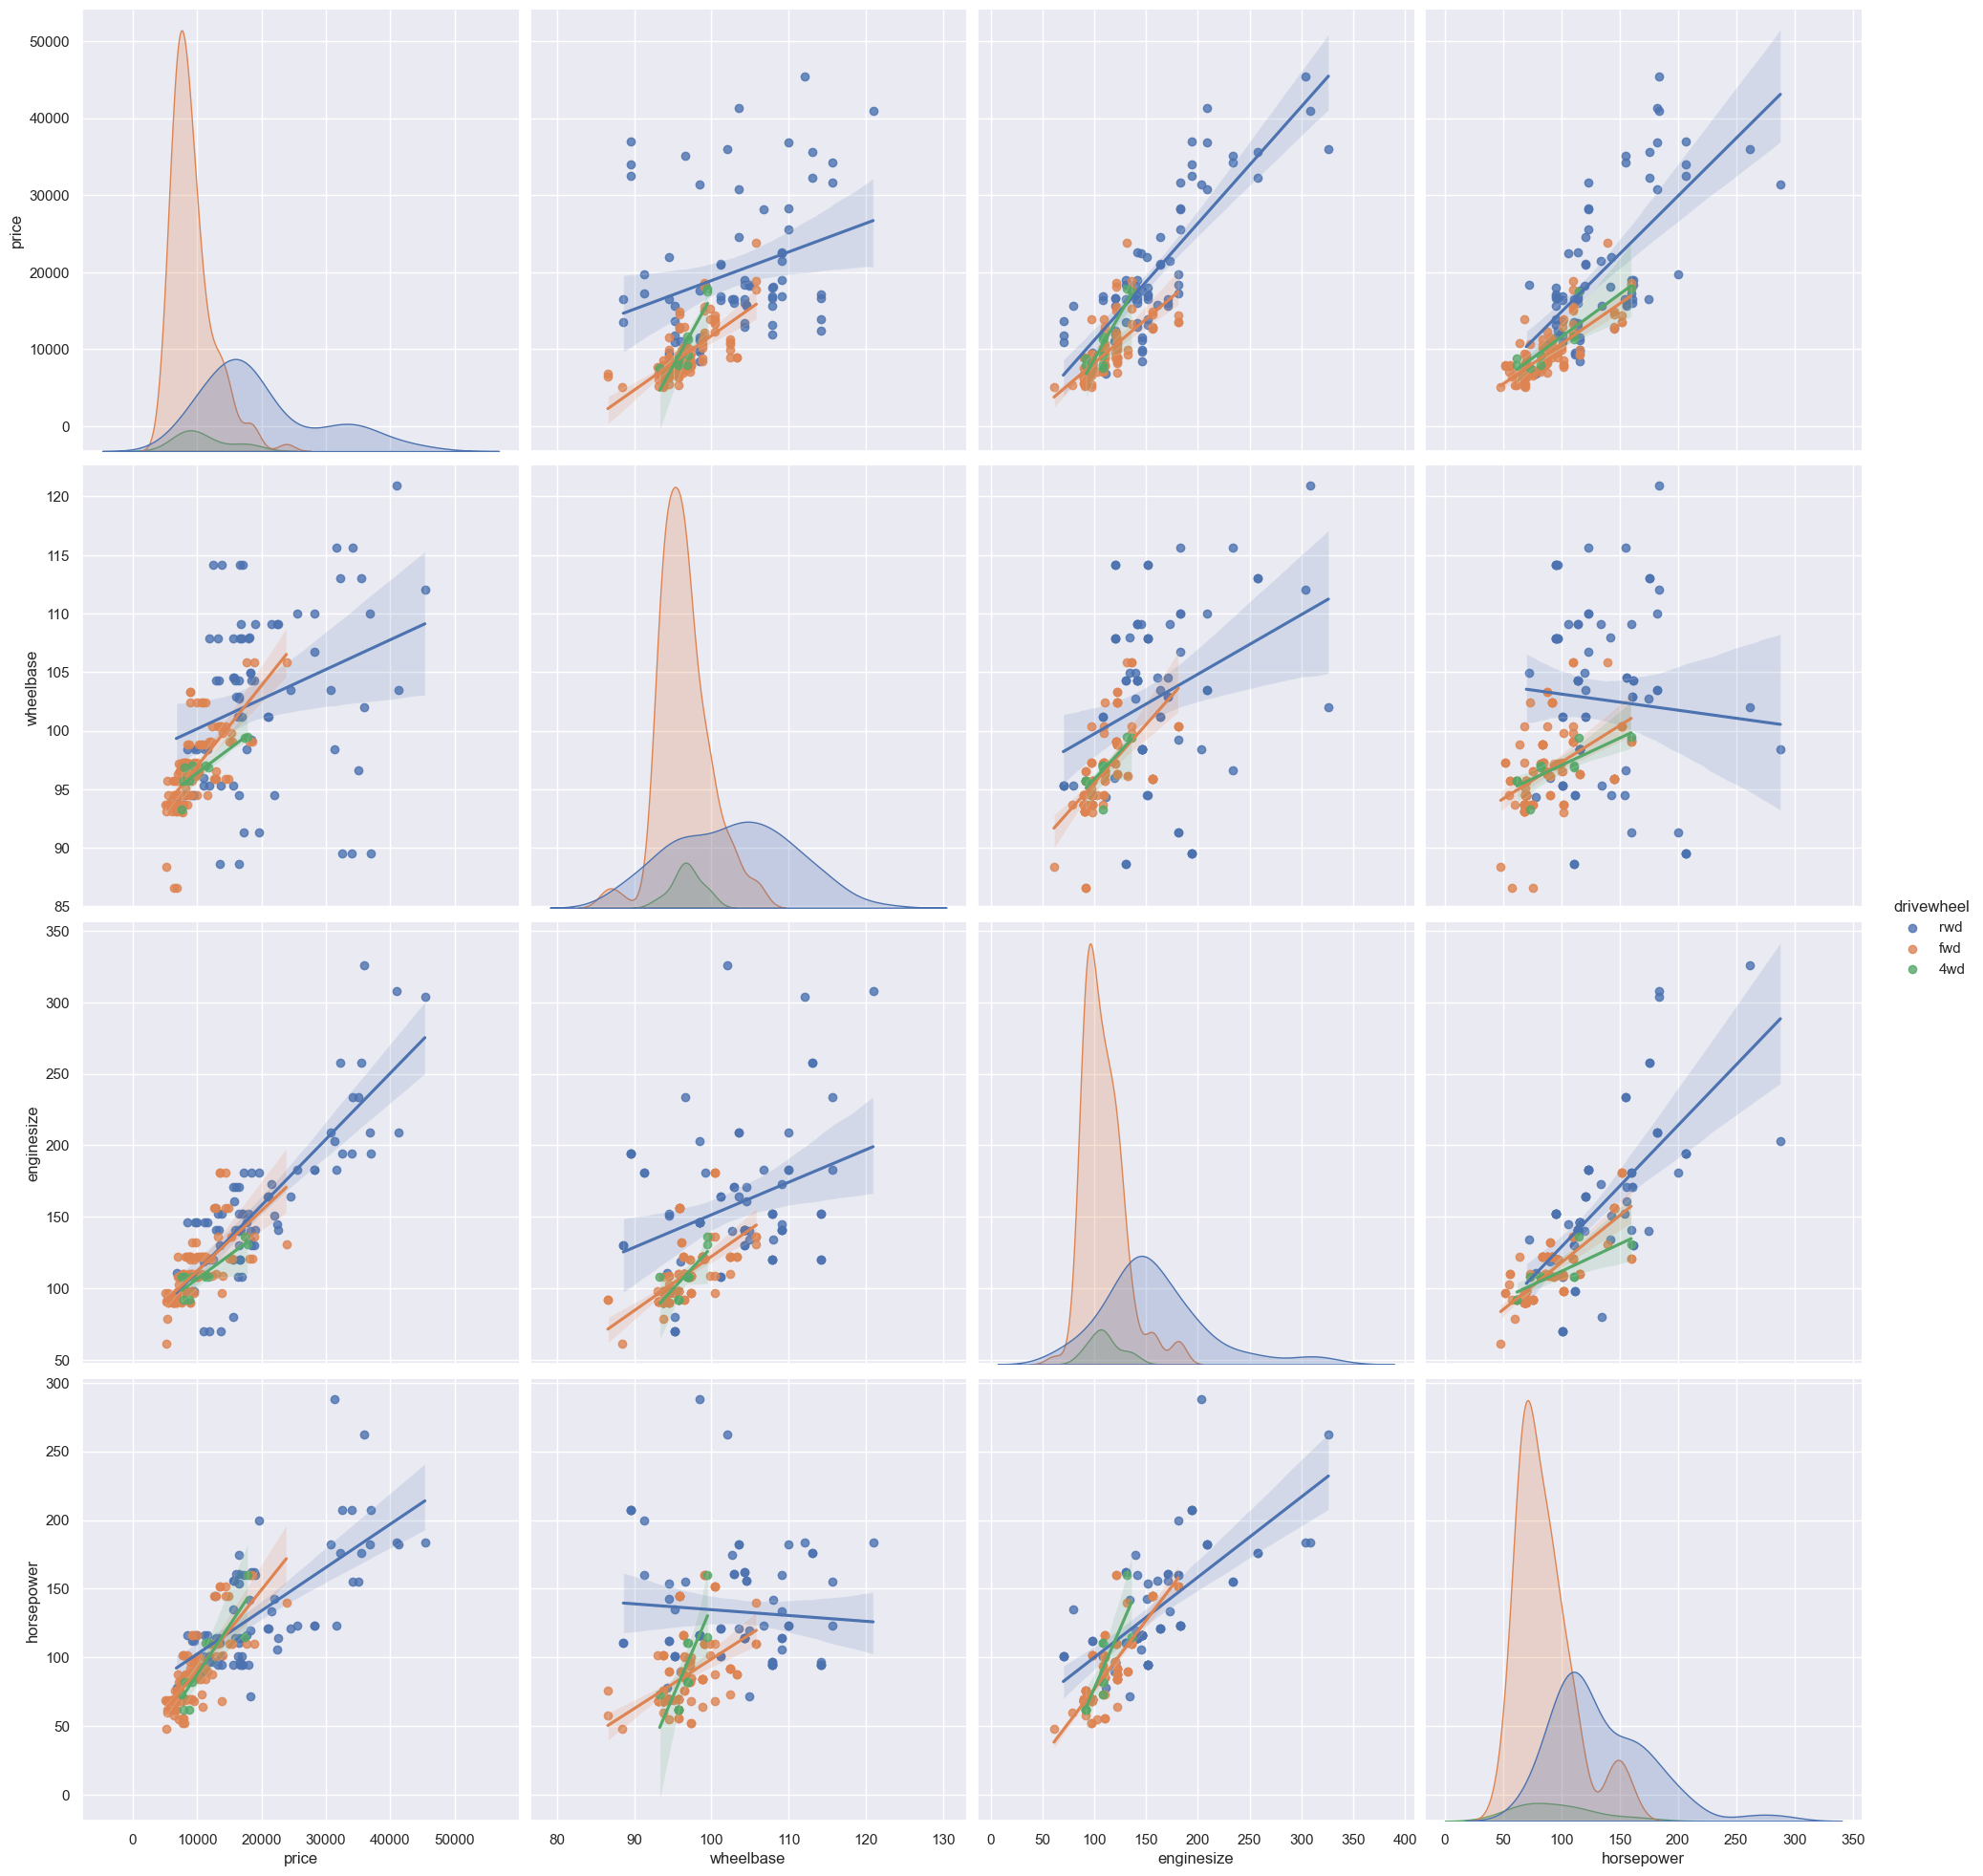

In [10]:
#We find some kind of correlation of price w.r.t. to these columns
#Vizualizing the subset with kind of relation in seaborn

g = sns.pairplot(car_raw_data[['price', 'wheelbase', 'enginesize','horsepower','drivewheel']], hue = 'drivewheel', height = 5, kind="reg")

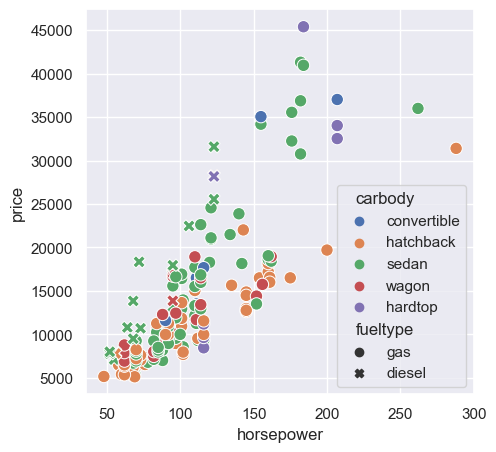

In [11]:
# Plotting Scatter plot b/w price and horsepower w.r.t carbody(type of car)

ax = sns.scatterplot(x="horsepower", y="price", data=car_raw_data, hue = 'carbody', style = 'fueltype', s=80)

In [12]:
#Drilling down the categorical data using bar by carbody and price

car_raw_data[['carbody', 'price']].groupby('carbody', as_index = False).agg({'price':'mean'})

#average price of the cars (carbody), means are taken by default.


carbody         price
0  convertible  21890.500000
1      hardtop  22208.500000
2    hatchback  10376.652386
3        sedan  14344.270833
4        wagon  12371.960000

[Text(0, 0, '21890.5'),
 Text(0, 0, '10376.7'),
 Text(0, 0, '14344.3'),
 Text(0, 0, '12372'),
 Text(0, 0, '22208.5')]

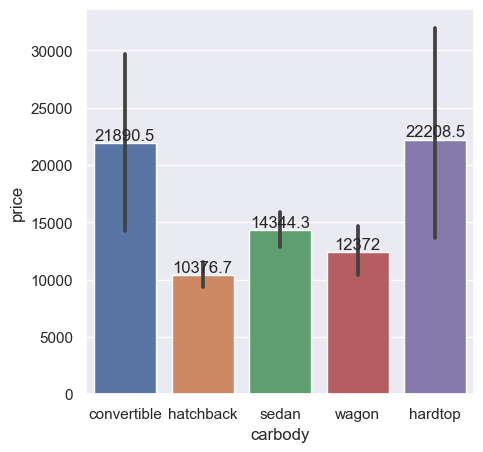

In [13]:
bx = sns.barplot(x="carbody", y="price", data=car_raw_data)
bx.bar_label(bx.containers[0])

#Lines signify the confidence interval

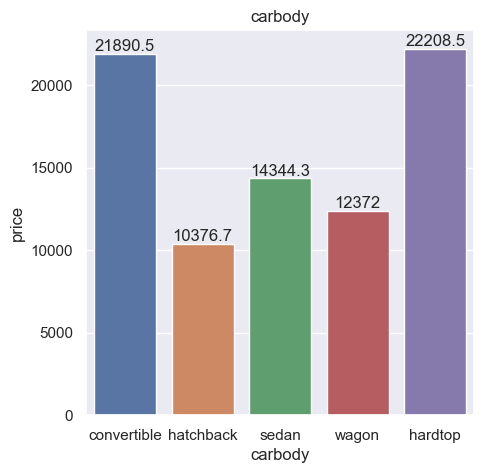

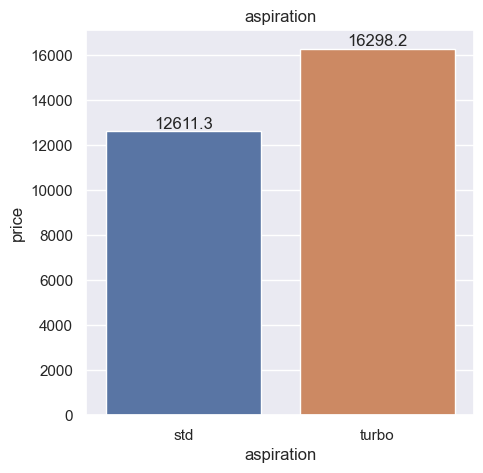

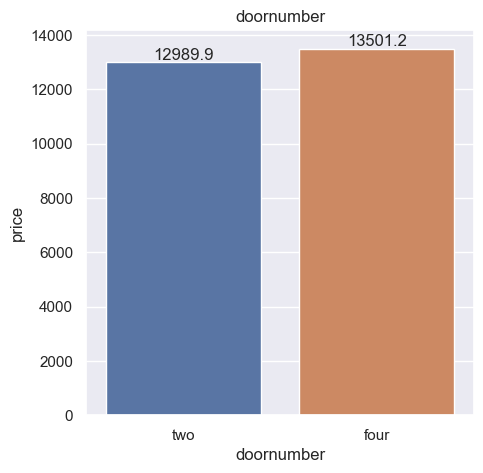

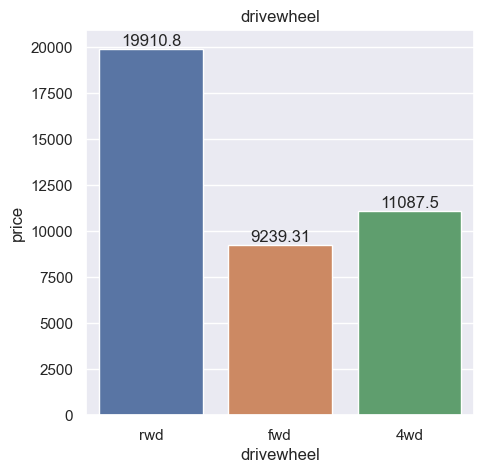

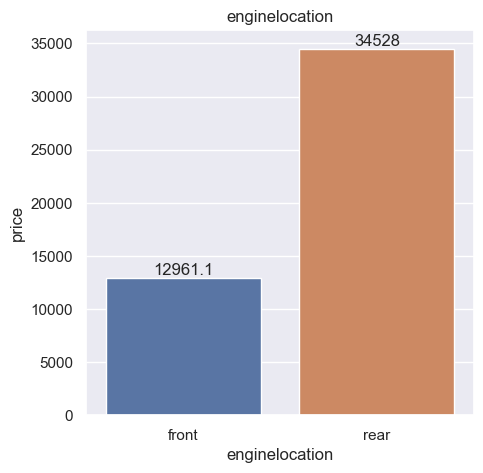

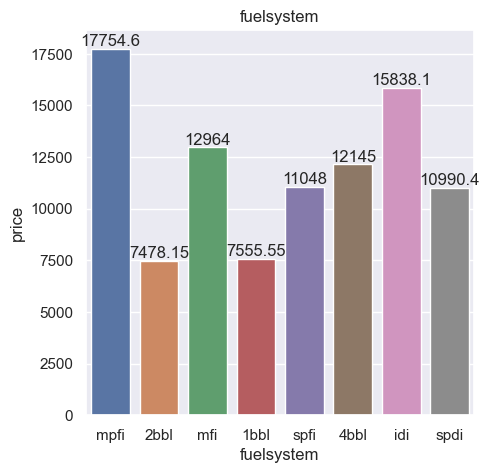

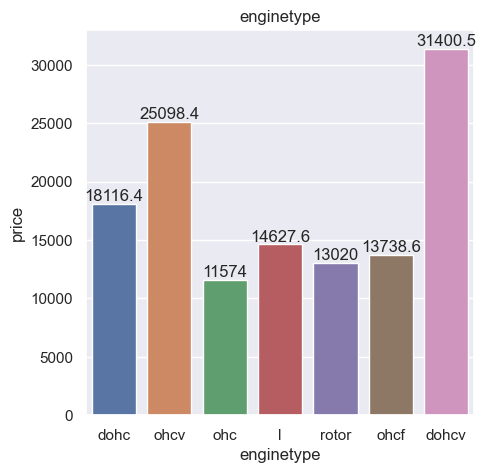

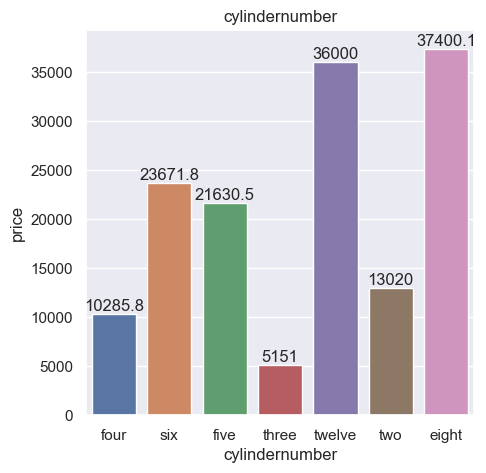

In [14]:
#Total price by carbody for multible categories

categories = ['carbody', 'aspiration','doornumber','drivewheel','enginelocation', 'fuelsystem', 'enginetype','cylindernumber']

# Increasing the size of sns plots
sns.set(rc={'figure.figsize':(5,5)})

for c in categories:
    
    bx = sns.barplot(x=c, y="price", data=car_raw_data, ci=False) #, hue = 'fueltype')
    for container in bx.containers:
        bx.bar_label(container)
    plt.title(c)
    plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_10980\4022008407.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'green');


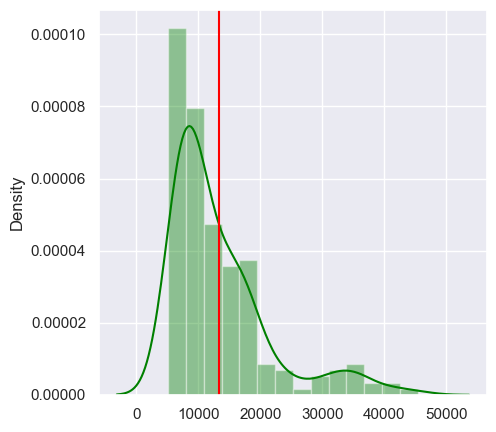

In [29]:
#Investigating the Plot using distribution of price, addition of mean

x = car_raw_data['price'].values

sns.distplot(x, color = 'green');

# Calculating the mean
mean = car_raw_data['price'].mean()

#ploting the mean
plt.axvline(mean, 0,1, color = 'red')

C:\Users\user\AppData\Local\Temp\ipykernel_1188\2545755013.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'green');


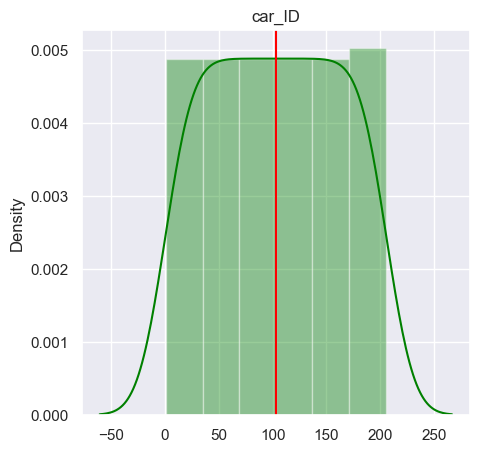

C:\Users\user\AppData\Local\Temp\ipykernel_1188\2545755013.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'green');


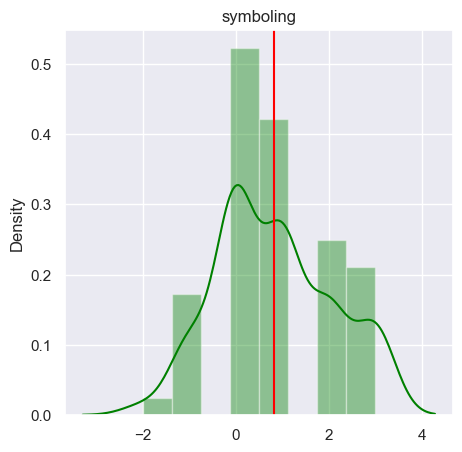

C:\Users\user\AppData\Local\Temp\ipykernel_1188\2545755013.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'green');


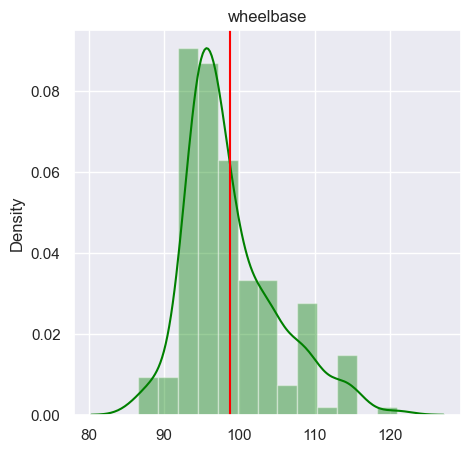

C:\Users\user\AppData\Local\Temp\ipykernel_1188\2545755013.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'green');


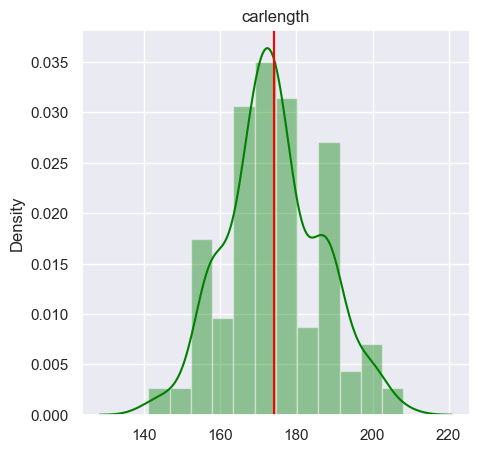

C:\Users\user\AppData\Local\Temp\ipykernel_1188\2545755013.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'green');


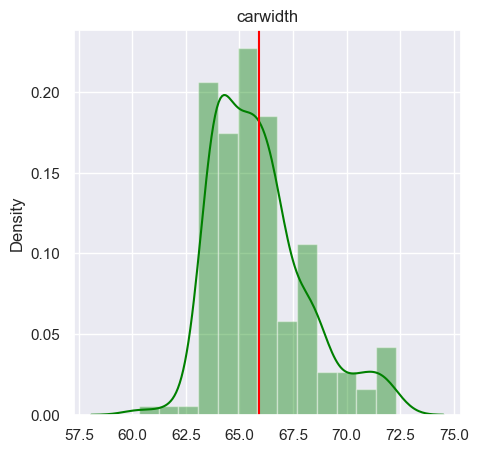

C:\Users\user\AppData\Local\Temp\ipykernel_1188\2545755013.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'green');


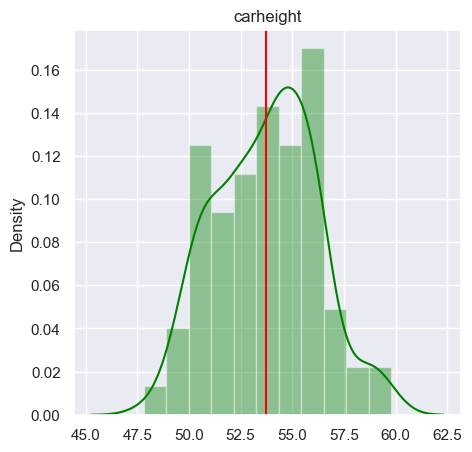

C:\Users\user\AppData\Local\Temp\ipykernel_1188\2545755013.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'green');


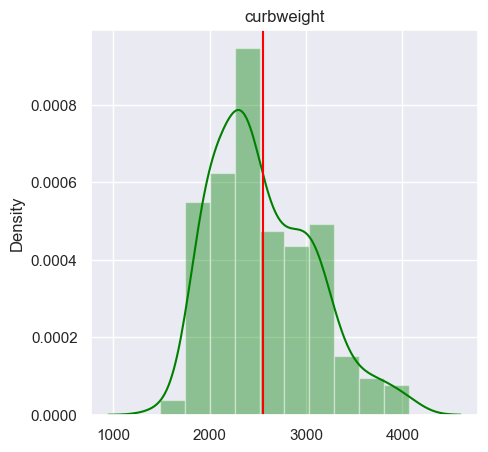

C:\Users\user\AppData\Local\Temp\ipykernel_1188\2545755013.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'green');


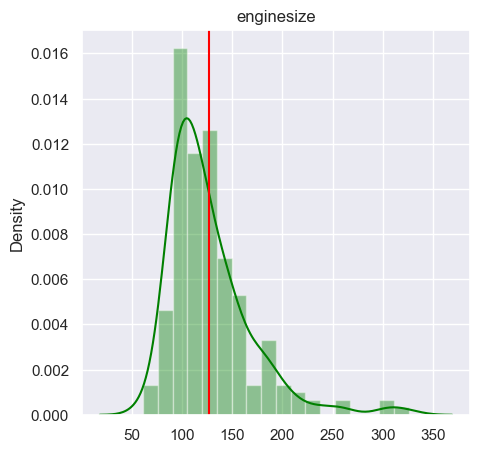

C:\Users\user\AppData\Local\Temp\ipykernel_1188\2545755013.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'green');


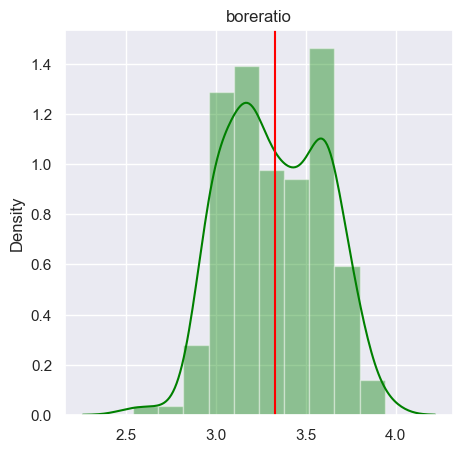

C:\Users\user\AppData\Local\Temp\ipykernel_1188\2545755013.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'green');


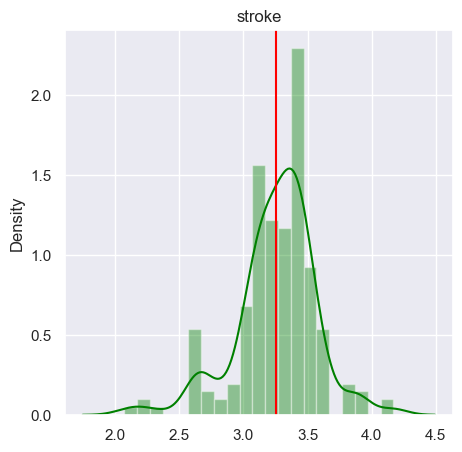

C:\Users\user\AppData\Local\Temp\ipykernel_1188\2545755013.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'green');


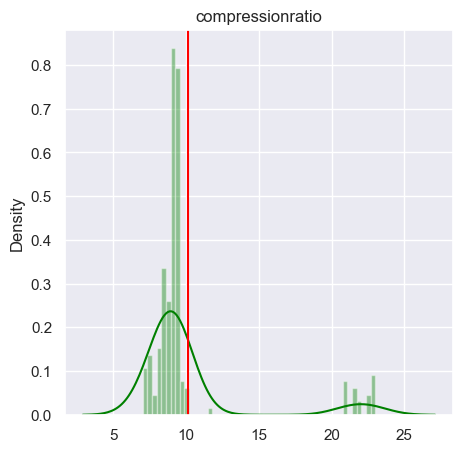

C:\Users\user\AppData\Local\Temp\ipykernel_1188\2545755013.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'green');


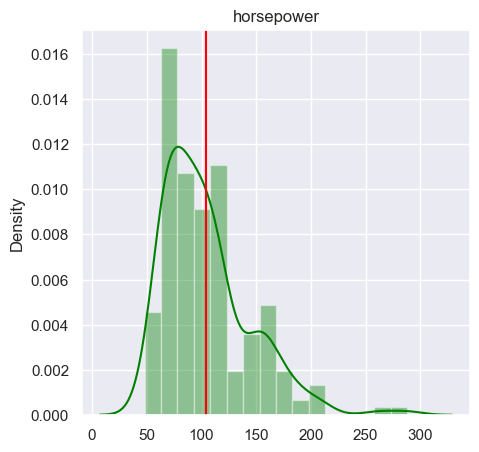

C:\Users\user\AppData\Local\Temp\ipykernel_1188\2545755013.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'green');


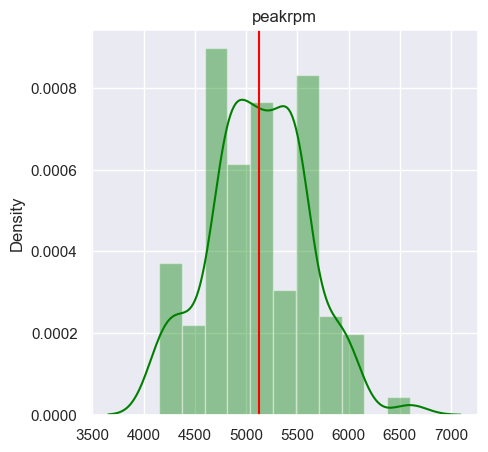

C:\Users\user\AppData\Local\Temp\ipykernel_1188\2545755013.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'green');


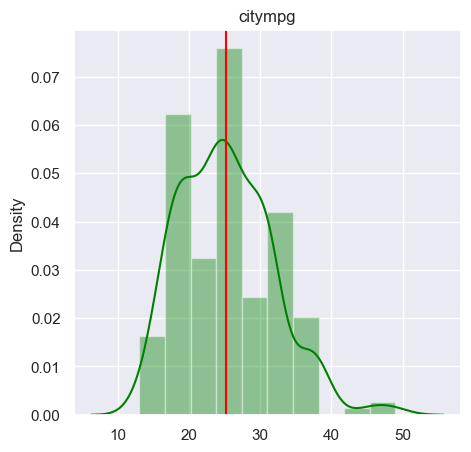

C:\Users\user\AppData\Local\Temp\ipykernel_1188\2545755013.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'green');


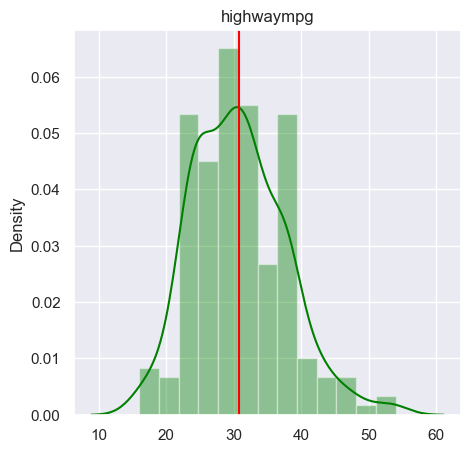

C:\Users\user\AppData\Local\Temp\ipykernel_1188\2545755013.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'green');


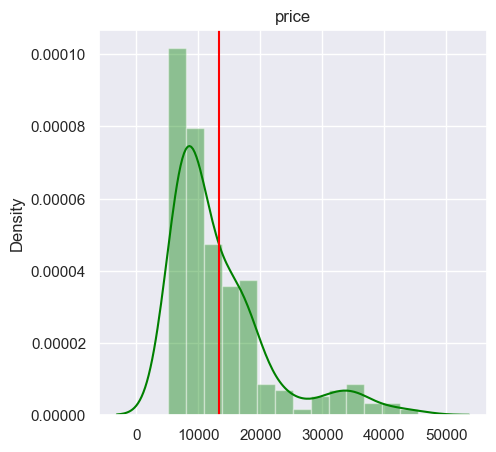

In [15]:
#Investigating the distribution of all field and adding the mean

# identifying all numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
n_variables = car_raw_data.select_dtypes(include=numerics).columns

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(5,5)})


for n in n_variables:
    x = car_raw_data[n].values
    sns.distplot(x, color = 'green');

    # Calculating the mean
    mean = car_raw_data[n].mean()

    #ploting the mean
    plt.axvline(mean, 0,1, color = 'red')
    plt.title(n)
    plt.show()

In [16]:
#checking what are the numeric variables.
n_variables

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

The meadian is:  10295.0


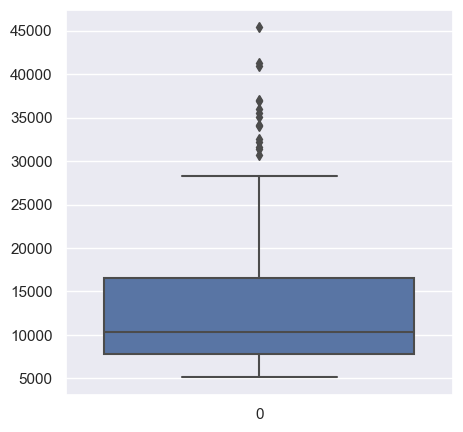

In [17]:
#Investigating the distribution and outliers with Box plots

#Distribution of price

x = car_raw_data['price'].values
bx = sns.boxplot(x)

print('The meadian is: ', car_raw_data['price'].median())

The meadian is:  103.0


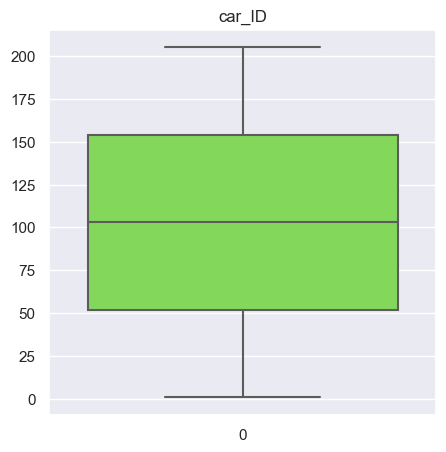

The meadian is:  1.0


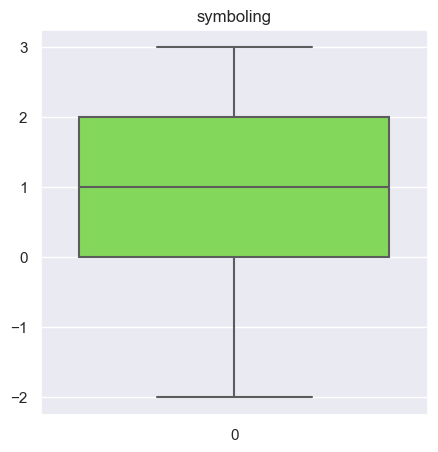

The meadian is:  97.0


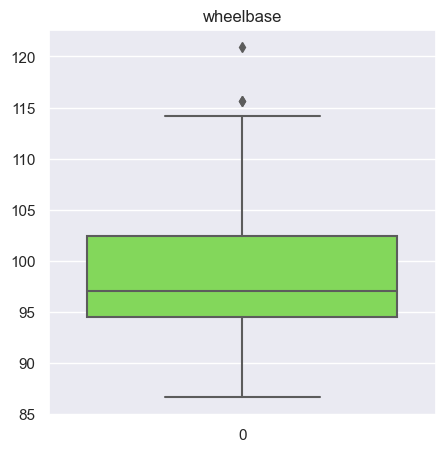

The meadian is:  173.2


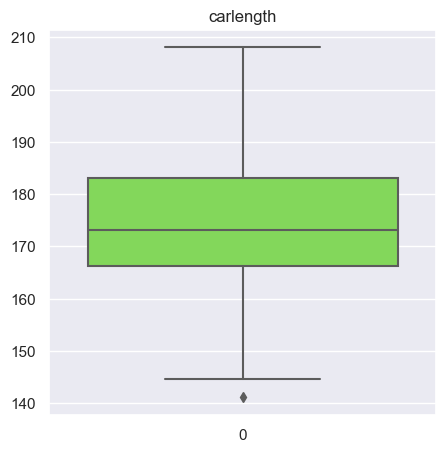

The meadian is:  65.5


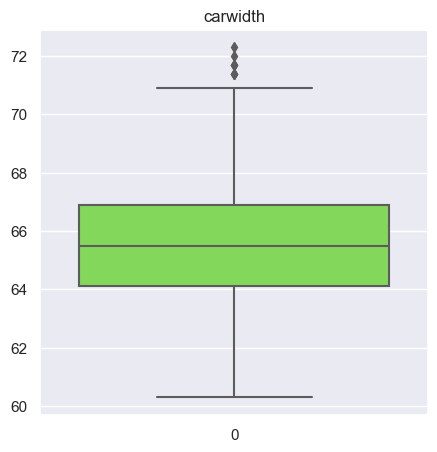

The meadian is:  54.1


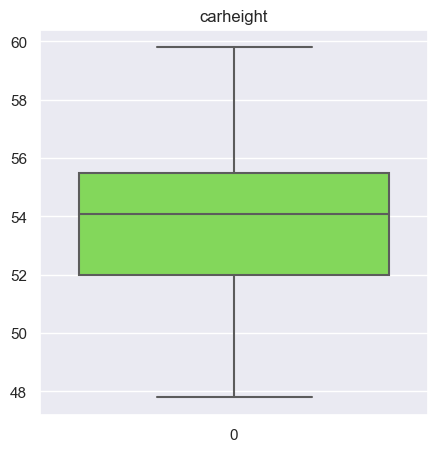

The meadian is:  2414.0


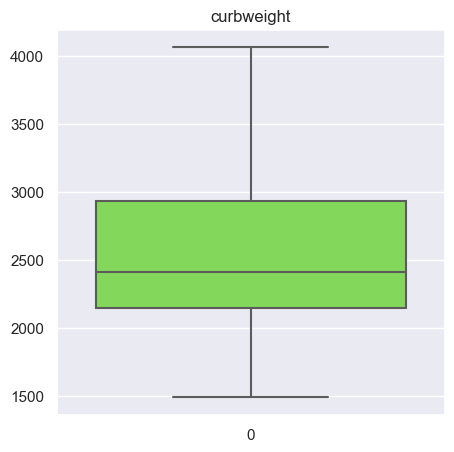

The meadian is:  120.0


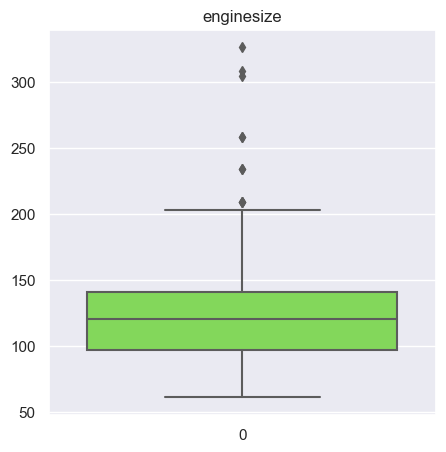

The meadian is:  3.31


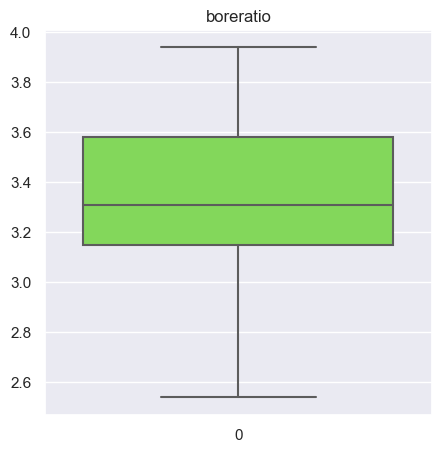

The meadian is:  3.29


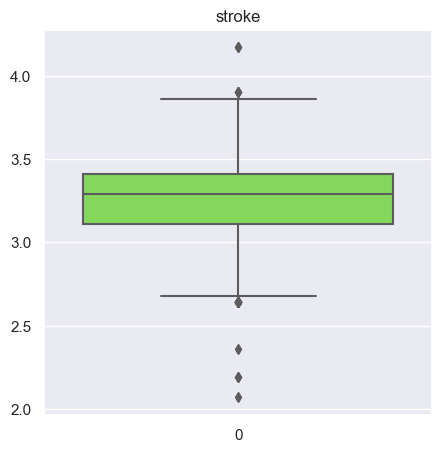

The meadian is:  9.0


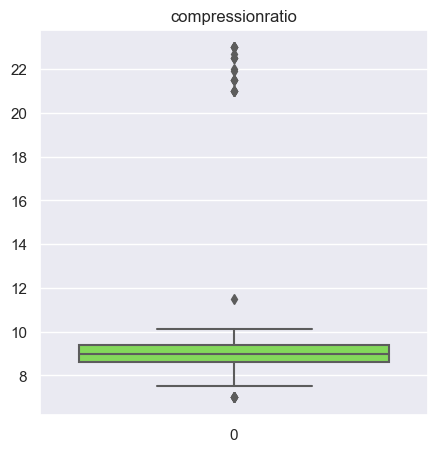

The meadian is:  95.0


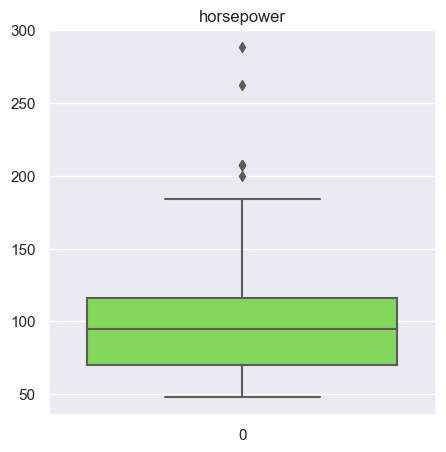

The meadian is:  5200.0


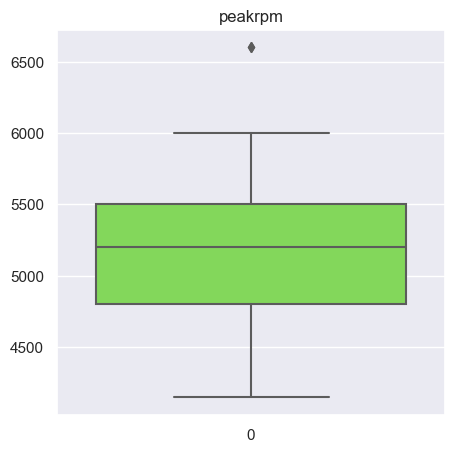

The meadian is:  24.0


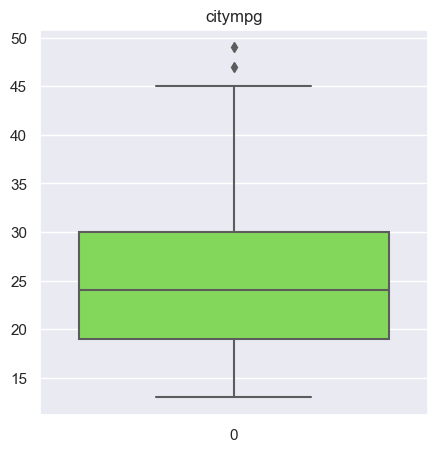

The meadian is:  30.0


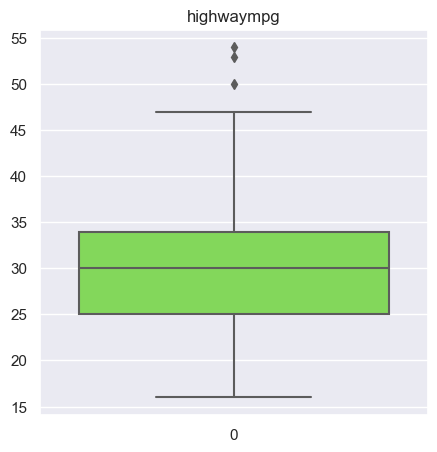

The meadian is:  10295.0


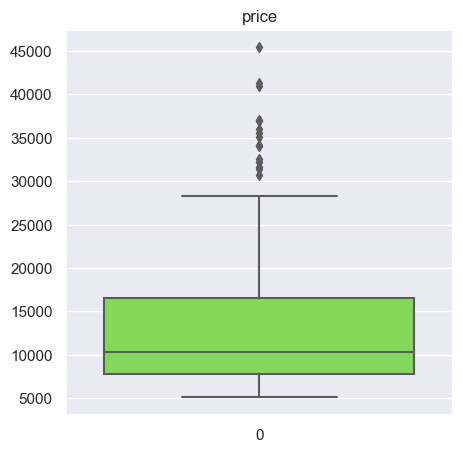

In [18]:
#investigating the distribution of all numerical values

for c in n_variables:    
    x = car_raw_data[c].values
    bx = sns.boxplot(x, color = '#7bec46')
    print('The meadian is: ', car_raw_data[c].median())
    plt.title(c)
    plt.show()

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 10.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


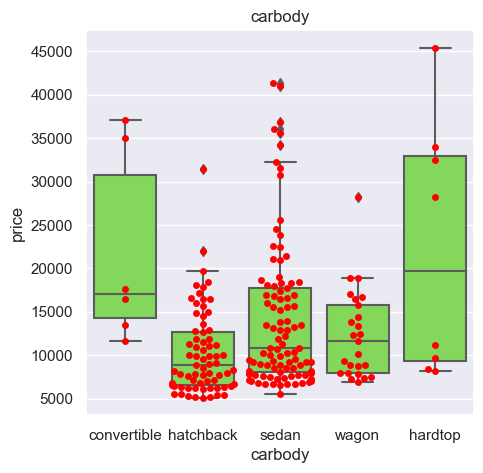

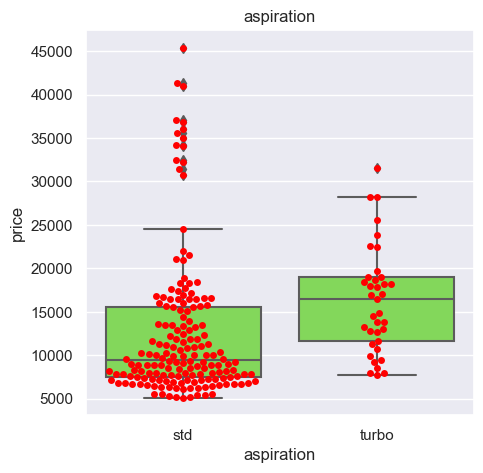

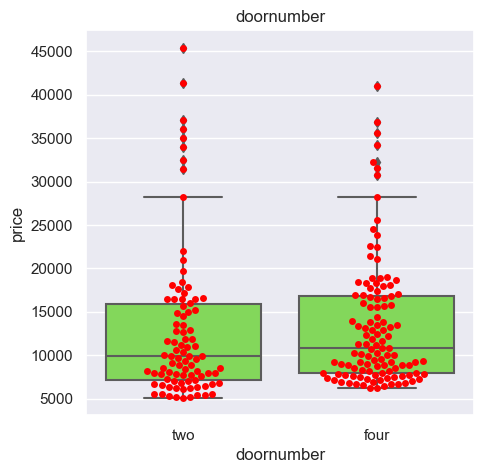

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 10.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


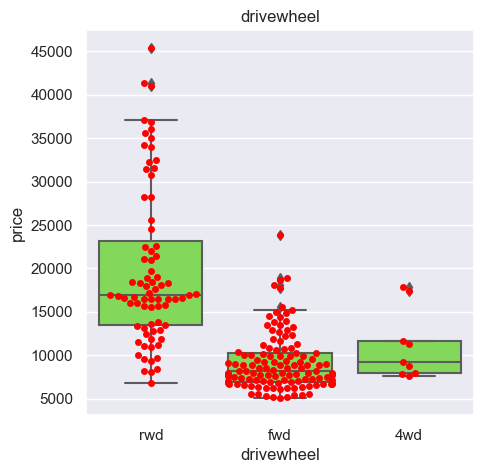

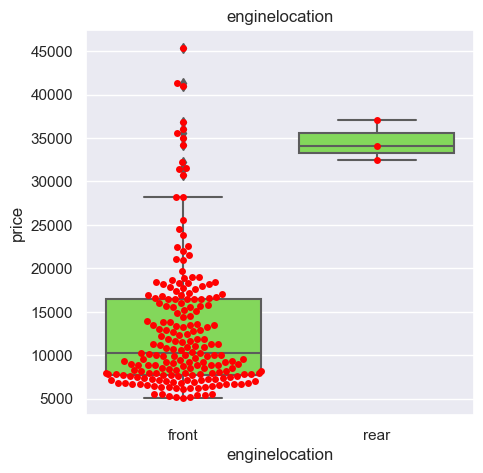

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 21.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 48.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


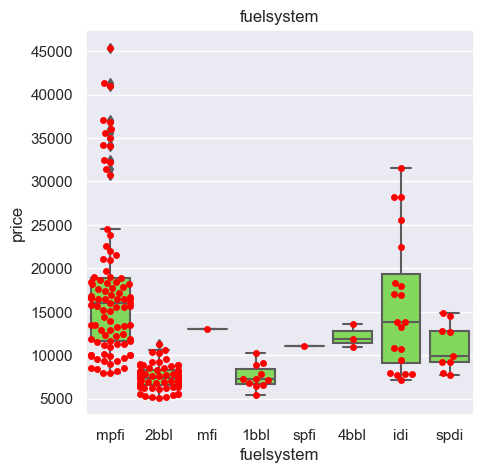

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 35.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


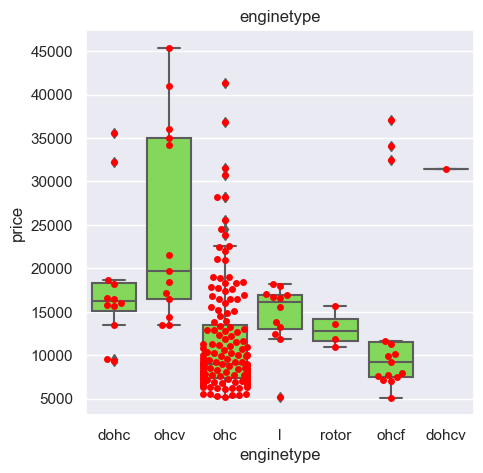

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 43.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


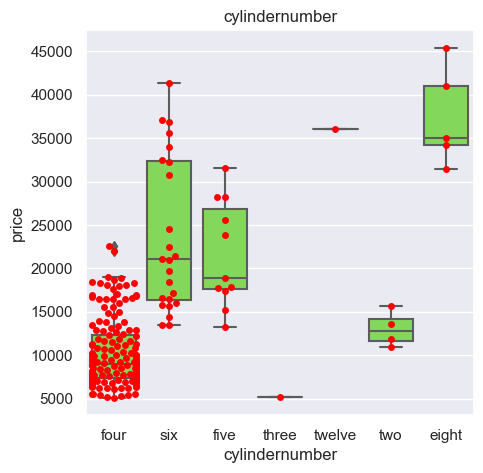

In [19]:
# Investigating the distribution of price by categorical variables - by data points

categories = ['carbody', 'aspiration','doornumber','drivewheel','enginelocation', 'fuelsystem', 'enginetype','cylindernumber']

for c in categories:
    bx = sns.boxplot(x=c, y="price", data=car_raw_data, color = '#7bec46')
    bx = sns.swarmplot(x=c, y="price", data=car_raw_data, color="red")
    plt.title(c)
    plt.show()

In [21]:
#Converting the categorical values into numerical values

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

car_raw_data.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [23]:
# Converting categorical variables into numeric representation

new_car_raw_data = pd.get_dummies(car_raw_data, columns = ['carbody', 'aspiration','doornumber','drivewheel','enginelocation', 'fuelsystem', 'enginetype', 'fueltype'])
new_car_raw_data.head()

car_ID  symboling                   CarName  wheelbase  carlength  \
0       1          3        alfa-romero giulia       88.6      168.8   
1       2          3       alfa-romero stelvio       88.6      168.8   
2       3          1  alfa-romero Quadrifoglio       94.5      171.2   
3       4          2               audi 100 ls       99.8      176.6   
4       5          2                audi 100ls       99.4      176.6   

   carwidth  carheight  curbweight cylindernumber  enginesize  boreratio  \
0      64.1       48.8        2548           four         130       3.47   
1      64.1       48.8        2548           four         130       3.47   
2      65.5       52.4        2823            six         152       2.68   
3      66.2       54.3        2337           four         109       3.19   
4      66.4       54.3        2824           five         136       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
0    2.68               9.0         111     5000       21          27   
1    2.68               9.0         111     5000       21          27   
2    3.47               9.0         154     5000       19          26   
3    3.40              10.0         102     5500       24          30   
4    3.40               8.0         115     5500       18          22   

     price  carbody_convertible  carbody_hardtop  carbody_hatchback  \
0  13495.0                    1                0                  0   
1  16500.0                    1                0                  0   
2  16500.0                    0                0                  1   
3  13950.0                    0                0                  0   
4  17450.0                    0                0                  0   

   carbody_sedan  carbody_wagon  aspiration_std  aspiration_turbo  \
0              0              0               1                 0   
1              0              0               1                 0   
2              0              0               1                 0   
3              1              0               1                 0   
4              1              0               1                 0   

   doornumber_four  doornumber_two  drivewheel_4wd  drivewheel_fwd  \
0                0               1               0               0   
1                0               1               0               0   
2                0               1               0               0   
3                1               0               0               1   
4                1               0               1               0   

   drivewheel_rwd  enginelocation_front  enginelocation_rear  fuelsystem_1bbl  \
0               1                     1                    0                0   
1               1                     1                    0                0   
2               1                     1                    0                0   
3               0                     1                    0                0   
4               0                     1                    0                0   

   fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  \
0                0                0               0               0   
1                0                0               0               0   
2                0                0               0               0   
3                0                0               0               0   
4                0                0               0               0   

   fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  enginetype_dohc  \
0                1                0                0                1   
1                1                0                0                1   
2                1                0                0                0   
3                1                0                0                0   
4                1                0                0                0   

   enginetype_dohcv  enginetype_l  enginetype_ohc  enginet

In [88]:
new_car_raw_data = pd.get_dummies(car_raw_data, columns = ['carbody', 'aspiration','doornumber','drivewheel','enginelocation', 'fuelsystem', 'enginetype', 'fueltype'])

new_car_raw_data['cylindernumber'].loc[new_car_raw_data['cylindernumber'] == 'two'] = 2
new_car_raw_data['cylindernumber'].loc[new_car_raw_data['cylindernumber'] == 'three'] = 3
new_car_raw_data['cylindernumber'].loc[new_car_raw_data['cylindernumber'] == 'four'] = 4
new_car_raw_data['cylindernumber'].loc[new_car_raw_data['cylindernumber'] == 'five'] = 5
new_car_raw_data['cylindernumber'].loc[new_car_raw_data['cylindernumber'] == 'six'] = 6
new_car_raw_data['cylindernumber'].loc[new_car_raw_data['cylindernumber'] == 'eight'] = 8
new_car_raw_data['cylindernumber'].loc[new_car_raw_data['cylindernumber'] == 'twelve'] = 12
new_car_raw_data['cylindernumber'] = new_car_raw_data['cylindernumber'].astype(int)

warnings.simplefilter(action='ignore', category=FutureWarning)

new_car_raw_data.dtypes

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


car_ID                    int32
symboling                 int64
CarName                  object
wheelbase               float64
carlength               float64
carwidth                float64
carheight               float64
curbweight                int64
cylindernumber            int32
enginesize                int64
boreratio               float64
stroke                  float64
compressionratio        float64
horsepower                int64
peakrpm                   int64
citympg                   int64
highwaympg                int64
price                   float64
carbody_convertible       uint8
carbody_hardtop           uint8
carbody_hatchback         uint8
carbody_sedan             uint8
carbody_wagon             uint8
aspiration_std            uint8
aspiration_turbo          uint8
doornumber_four           uint8
doornumber_two            uint8
drivewheel_4wd            uint8
drivewheel_fwd            uint8
drivewheel_rwd            uint8
enginelocation_front      uint8
enginelo

In [26]:
new_car_raw_data.head()

car_ID  symboling                   CarName  wheelbase  carlength  \
0       1          3        alfa-romero giulia       88.6      168.8   
1       2          3       alfa-romero stelvio       88.6      168.8   
2       3          1  alfa-romero Quadrifoglio       94.5      171.2   
3       4          2               audi 100 ls       99.8      176.6   
4       5          2                audi 100ls       99.4      176.6   

   carwidth  carheight  curbweight  cylindernumber  enginesize  boreratio  \
0      64.1       48.8        2548               4         130       3.47   
1      64.1       48.8        2548               4         130       3.47   
2      65.5       52.4        2823               6         152       2.68   
3      66.2       54.3        2337               4         109       3.19   
4      66.4       54.3        2824               5         136       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
0    2.68               9.0         111     5000       21          27   
1    2.68               9.0         111     5000       21          27   
2    3.47               9.0         154     5000       19          26   
3    3.40              10.0         102     5500       24          30   
4    3.40               8.0         115     5500       18          22   

     price  carbody_convertible  carbody_hardtop  carbody_hatchback  \
0  13495.0                    1                0                  0   
1  16500.0                    1                0                  0   
2  16500.0                    0                0                  1   
3  13950.0                    0                0                  0   
4  17450.0                    0                0                  0   

   carbody_sedan  carbody_wagon  aspiration_std  aspiration_turbo  \
0              0              0               1                 0   
1              0              0               1                 0   
2              0              0               1                 0   
3              1              0               1                 0   
4              1              0               1                 0   

   doornumber_four  doornumber_two  drivewheel_4wd  drivewheel_fwd  \
0                0               1               0               0   
1                0               1               0               0   
2                0               1               0               0   
3                1               0               0               1   
4                1               0               1               0   

   drivewheel_rwd  enginelocation_front  enginelocation_rear  fuelsystem_1bbl  \
0               1                     1                    0                0   
1               1                     1                    0                0   
2               1                     1                    0                0   
3               0                     1                    0                0   
4               0                     1                    0                0   

   fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  \
0                0                0               0               0   
1                0                0               0               0   
2                0                0               0               0   
3                0                0               0               0   
4                0                0               0               0   

   fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  enginetype_dohc  \
0                1                0                0                1   
1                1                0                0                1   
2                1                0                0                0   
3                1                0                0                0   
4                1                0                0                0   

   enginetype_dohcv  enginetype_l  enginetype_ohc  e

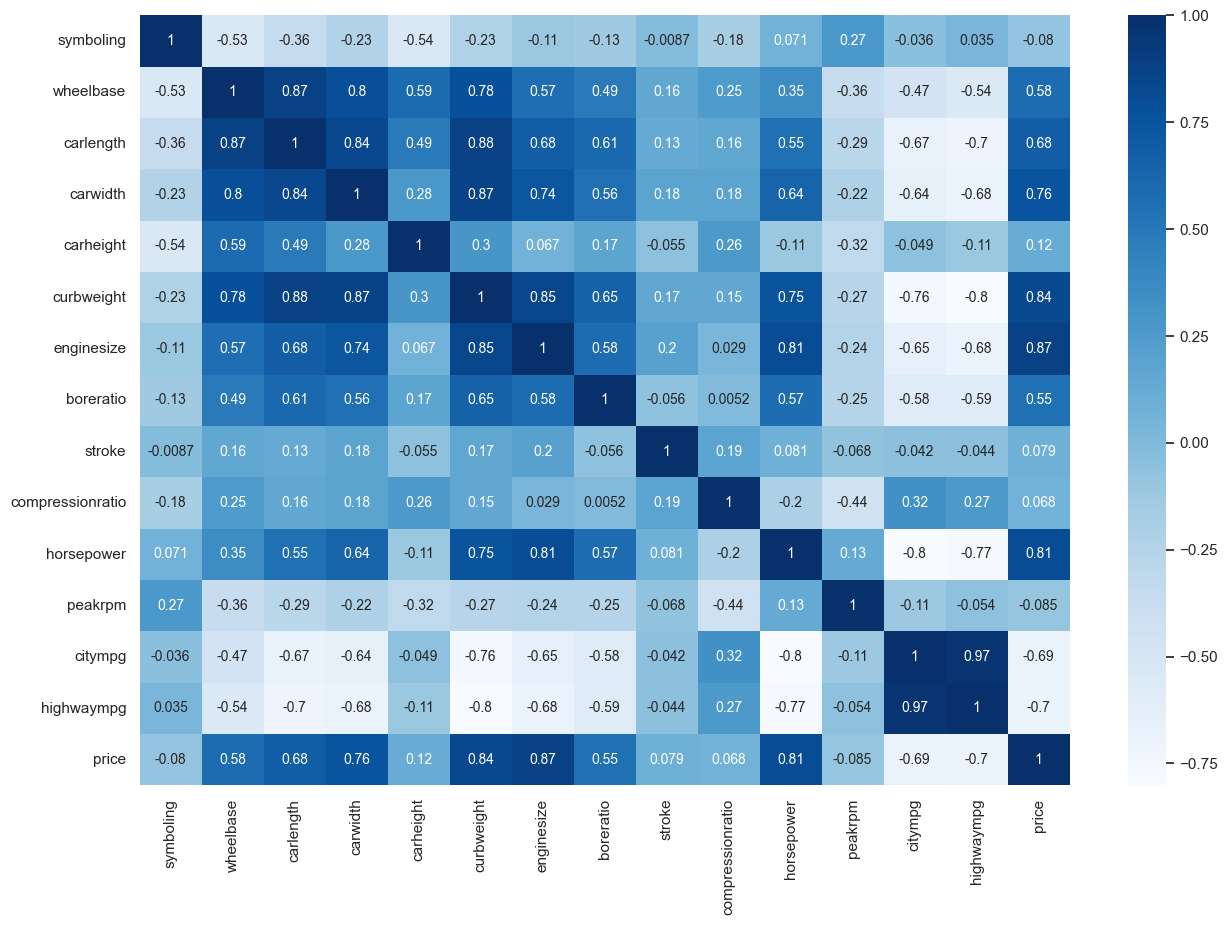

In [51]:
#Heatmap feature selection
# droping columns we don't need
#del new_car_raw_data['car_ID']
#del new_car_raw_data['CarName']

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(15,10)})

n_variables = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

pc = new_car_raw_data[n_variables].corr(method ='pearson')

cols = n_variables

bx = sns.heatmap(pc, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size':10},
                 cmap="Blues")

In [29]:
#Feature Importance
#Splillting the data into X and y

X = new_car_raw_data.drop(['price'], axis = 1).values
X_columns = new_car_raw_data.drop(['price'], axis = 1)
y = new_car_raw_data['price'].astype(int)

print(X.shape)
print(y.shape)

(205, 46)
(205,)


In [30]:
#1. Running a tree based estimator
dt = DecisionTreeClassifier(random_state=15, criterion  = 'entropy', max_depth = 10)
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [31]:
dt.feature_importances_

array([0.002621, 0.101383, 0.067869, 0.023265, 0.108850, 0.276795,
       0.006323, 0.041932, 0.050348, 0.017398, 0.031393, 0.097189,
       0.028420, 0.019693, 0.030768, 0.000000, 0.003115, 0.010162,
       0.018708, 0.001310, 0.004426, 0.000000, 0.005736, 0.006323,
       0.000000, 0.005736, 0.001310, 0.000000, 0.000000, 0.000000,
       0.009173, 0.000000, 0.000000, 0.000000, 0.011110, 0.000000,
       0.000000, 0.000000, 0.000000, 0.000000, 0.013401, 0.000000,
       0.000000, 0.000000, 0.001310, 0.003931])

In [38]:


# Calculating FI
for i, column in enumerate(new_car_raw_data.drop('price', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
        
# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi

Importance of feature symboling:, 0.003
Importance of feature wheelbase:, 0.101
Importance of feature carlength:, 0.068
Importance of feature carwidth:, 0.023
Importance of feature carheight:, 0.109
Importance of feature curbweight:, 0.277
Importance of feature cylindernumber:, 0.006
Importance of feature enginesize:, 0.042
Importance of feature boreratio:, 0.050
Importance of feature stroke:, 0.017
Importance of feature compressionratio:, 0.031
Importance of feature horsepower:, 0.097
Importance of feature peakrpm:, 0.028
Importance of feature citympg:, 0.020
Importance of feature highwaympg:, 0.031
Importance of feature carbody_convertible:, 0.000
Importance of feature carbody_hardtop:, 0.003
Importance of feature carbody_hatchback:, 0.010
Importance of feature carbody_sedan:, 0.019
Importance of feature carbody_wagon:, 0.001
Importance of feature aspiration_std:, 0.004
Importance of feature aspiration_turbo:, 0.000
Importance of feature doornumber_four:, 0.006
Importance of feature 

index              Variable  Feature Importance Score
0       5            curbweight                  0.276795
1       4             carheight                  0.108850
2       1             wheelbase                  0.101383
3      11            horsepower                  0.097189
4       2             carlength                  0.067869
5       8             boreratio                  0.050348
6       7            enginesize                  0.041932
7      10      compressionratio                  0.031393
8      14            highwaympg                  0.030768
9      12               peakrpm                  0.028420
10      3              carwidth                  0.023265
11     13               citympg                  0.019693
12     18         carbody_sedan                  0.018708
13      9                stroke                  0.017398
14     40        enginetype_ohc                  0.013401
15     34       fuelsystem_mpfi                  0.011110
16     17     carbody_hatchback                  0.010162
17     30       fuelsystem_2bbl                  0.009173
18     23        doornumber_two                  0.006323
19      6        cylindernumber                  0.006323
20     25        drivewheel_fwd                  0.005736
21     22       doornumber_four                  0.005736
22     20        aspiration_std                  0.004426
23     45          fueltype_gas                  0.003931
24     16       carbody_hardtop                  0.003115
25      0             symboling                  0.002621
26     26        drivewheel_rwd                  0.001310
27     44       fueltype_diesel                  0.001310
28     19         carbody_wagon                  0.001310
29     37       enginetype_dohc                  0.000000
30     43      enginetype_rotor                  0.000000
31     42       enginetype_ohcv                  0.000000
32     41       enginetype_ohcf                  0.000000
33     15   carbody_convertible                  0.000000
34     39          enginetype_l                  0.000000
35     38      enginetype_dohcv                  0.000000
36     24        drivewheel_4wd                  0.000000
37     36       fuelsystem_spfi                  0.000000
38     21      aspiration_turbo                  0.000000
39     33        fuelsystem_mfi                  0.000000
40     32        fuelsystem_idi                  0.000000
41     31       fuelsystem_4bbl                  0.000000
42     29       fuelsystem_1bbl                  0.000000
43     28   enginelocation_rear                  0.000000
44     27  enginelocation_front                  0.000000
45     35       fuelsystem_spdi                  0.000000

In [39]:
#HOlD-OUT VALIDATION- SPLITTING THE DATA
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(164, 46)
(41, 46)
(164,)
(41,)


In [40]:
#Starting Linear Regression 

#Training the regression

lm = LinearRegression(fit_intercept = True)
lm.fit(X_train, y_train)

y_pred = lm.predict(X_train)

In [46]:
# Checking Model Accuracy on training dataset

print('The Accuracy  on the training dataset is: ', lm.score(X_train, y_train) )
print('The Accuracy r2  on the training dataset prediction is: ',r2_score(y_train,y_pred) )   

print("")
# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lm.score(X_test, y_test) )

print("")
# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ', sqrt(mean_squared_error(y_train,y_pred)))
print('The RMSE  on the testing dataset is: ', sqrt(mean_squared_error(y_test,lm.predict(X_test))))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,lm.predict(X_test)))


print("")
# Coefficients
print('Coefficients: ', lm.coef_ )

print("")
# The Intercept
print('Intercept: ', lm.intercept_)


The Accuracy  on the training dataset is:  0.9318255662222911
The Accuracy r2  on the training dataset prediction is:  0.9318255662222911

The Accuracy  on the testing dataset is:  0.8247350935155555

The RMSE  on the training dataset is:  2055.199602330757
The RMSE  on the testing dataset is:  3495.568709071594

The MAE  on the training dataset is:  1502.134244591261
The MAE  on the testing dataset is:  2418.2598196478457

Coefficients:  [375.223403 49.980585 -39.598371 583.472001 231.003268 4.727986
 -1719.351425 202.278843 -9761.603504 -6363.456916 -1216.264785 17.534555
 2.980697 -20.605172 171.139044 3157.357052 -2275.384940 -37.689427
 369.534191 -1213.816876 -492.821176 492.821176 124.412268 -124.412268
 -676.682688 -751.176719 1427.859408 -3653.529908 3653.529908 -667.939974
 689.659364 226.247529 5729.711799 -3072.010748 527.200669 -2775.442830
 -657.425810 -2789.433258 3283.250551 -2975.335571 1267.351716 1747.692867
 -6929.471245 6395.944940 5729.711799 -5729.711799]

Interc

In [54]:
#Trying regression with less variables
final_fi['Variable'][0:10].values

array(['curbweight', 'carheight', 'wheelbase', 'horsepower', 'carlength',
       'boreratio', 'enginesize', 'compressionratio', 'highwaympg',
       'peakrpm'], dtype=object)

In [56]:
# Split the data into X & y

test1 = final_fi['Variable'][0:10].values

X2 = new_car_raw_data[test1].values
y2 = new_car_raw_data['price'].astype(int)

# Hold-out validation
X_train, X_test, y_train, y_test = train_test_split(X2, y2, train_size=0.80, test_size = 0.2, random_state=15)


print(X.shape)
print(y.shape)

lm2 = LinearRegression(fit_intercept = True)
lm2.fit(X_train, y_train)

y_pred = lm2.predict(X_train)


# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lm2.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm2.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,lm2.predict(X_test)))

(205, 46)
(205,)
The Accuracy  on the testing dataset is:  0.8886586460418304
The RMSE  on the testing dataset is:  2786.112247787894
The MAE  on the testing dataset is:  2045.0313297332941


In [58]:
 #Trying the recursive feature elimination proces
 # with Linear Regression
from sklearn.feature_selection import RFE

selector = RFE(lm, n_features_to_select=10, step=1)
selector = selector.fit(X, y)
selector.support_

print('Chosen best 10 feature by rfe:',X_columns.columns[selector.support_])

rfe_lr = X_columns.columns[selector.support_]

rfe_lr

Chosen best 10 feature by rfe: Index(['carwidth', 'carbody_convertible', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'fuelsystem_4bbl',
       'fuelsystem_spfi', 'enginetype_dohc', 'enginetype_l',
       'enginetype_ohcv'],
      dtype='object')


Index(['carwidth', 'carbody_convertible', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'fuelsystem_4bbl',
       'fuelsystem_spfi', 'enginetype_dohc', 'enginetype_l',
       'enginetype_ohcv'],
      dtype='object')

In [59]:
# Split the data into X & y

test1 = rfe_lr

X2 = new_car_raw_data[test1].values
y2 = new_car_raw_data['price'].astype(int)

# Hold-out validation
X_train, X_test, y_train, y_test = train_test_split(X2, y2, train_size=0.80, test_size = 0.2, random_state=15)


print(X.shape)
print(y.shape)

lm2 = LinearRegression(fit_intercept = True)
lm2.fit(X_train, y_train)

y_pred = lm2.predict(X_train)


# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lm2.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm2.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,lm2.predict(X_test)))

(205, 46)
(205,)
The Accuracy  on the testing dataset is:  0.8226144299201712
The RMSE  on the testing dataset is:  3516.6528965468387
The MAE  on the testing dataset is:  2410.4047460752327


In [60]:
#With Support Vector Regressor

from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=10, step=1)
selector = selector.fit(X, y)
selector.support_
print('Chosen best 10 feature by rfe:',X_columns.columns[selector.support_])

rfe_svr = X_columns.columns[selector.support_]

Chosen best 10 feature by rfe: Index(['wheelbase', 'carlength', 'carwidth', 'enginesize', 'compressionratio',
       'horsepower', 'citympg', 'carbody_hatchback', 'drivewheel_fwd',
       'drivewheel_rwd'],
      dtype='object')


In [61]:
# Split the data into X & y

test1 = rfe_svr

X2 = new_car_raw_data[test1].values
y2 = new_car_raw_data['price'].astype(int)

# Hold-out validation
X_train, X_test, y_train, y_test = train_test_split(X2, y2, train_size=0.80, test_size = 0.2, random_state=15)


print(X.shape)
print(y.shape)

lm2 = LinearRegression(fit_intercept = True)
lm2.fit(X_train, y_train)

y_pred = lm2.predict(X_train)


# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lm2.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm2.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,lm2.predict(X_test)))

(205, 46)
(205,)
The Accuracy  on the testing dataset is:  0.8933071005120905
The RMSE  on the testing dataset is:  2727.33269737213
The MAE  on the testing dataset is:  2087.236816959346


In [62]:
#Trying other models

from sklearn.ensemble import RandomForestRegressor

# Hold-out validation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_train)


# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', regr.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,regr.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,regr.predict(X_test)))

The Accuracy  on the testing dataset is:  0.8780755290763865
The RMSE  on the testing dataset is:  2915.518491028241
The MAE  on the testing dataset is:  2129.754296476598


In [63]:
#Neural Network Regressor - MLPRegressor
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=500)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_train)
# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', regr.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,regr.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,regr.predict(X_test)))

The Accuracy  on the testing dataset is:  0.5776609379451172
The RMSE  on the testing dataset is:  5426.2648312677775
The MAE  on the testing dataset is:  3579.124864131364


c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [64]:
#XG Boost Regressor

from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_train)

# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', reg.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,reg.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,reg.predict(X_test)))

The Accuracy  on the testing dataset is:  0.943045908453219
The RMSE  on the testing dataset is:  1992.6582648025094
The MAE  on the testing dataset is:  1365.0997453982443


In [69]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

params = { 'max_depth': [3,6,9,12],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}

xgbr = xgb.XGBRegressor(seed = 20)

clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)

clf.fit(X_train, y_train)

print("Best parameters:", clf.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 12, 'n_estimators': 500}


In [70]:
clf.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 12,
 'n_estimators': 500}

In [71]:
# Training the model on best parameters

xgbr = xgb.XGBRegressor(seed = 20, colsample_bytree = 0.7, learning_rate= 0.1, max_depth=12, n_estimators=500)
xgbr.fit(X_train, y_train)
xgbr

y_pred = xgbr.predict(X_train)
# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', xgbr.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,xgbr.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,xgbr.predict(X_test)))

The Accuracy  on the testing dataset is:  0.9350173923901867
The RMSE  on the testing dataset is:  2128.4768335468075
The MAE  on the testing dataset is:  1301.5168516577744


In [90]:
# Conclusions: XGBooster Regressor without optimization did the best job!

from sklearn.ensemble import GradientBoostingRegressor

# Split the data into X & y
#del new_car_data

X = new_car_raw_data.drop(['price', 'CarName'], axis = 1).values
X_columns = new_car_raw_data.drop(['price', 'CarName'], axis = 1)
y = new_car_raw_data['price'].astype(int)


print(X.shape)
print(y.shape)

# Hold-out validation

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_train)

# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', reg.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,reg.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,reg.predict(X_test)))


(205, 47)
(205,)
(164, 47)
(41, 47)
(164,)
(41,)
The Accuracy  on the testing dataset is:  0.944538667933968
The RMSE  on the testing dataset is:  1966.3712165085378
The MAE  on the testing dataset is:  1374.4676099853177


In [76]:
X_train.shape


(164, 46)

In [77]:
y_pred.shape

(164,)

C:\Users\user\AppData\Local\Temp\ipykernel_1188\2758854620.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', c='red', lw=3)


Text(0.5, 1.0, 'Actuals Vs Predicted Values')

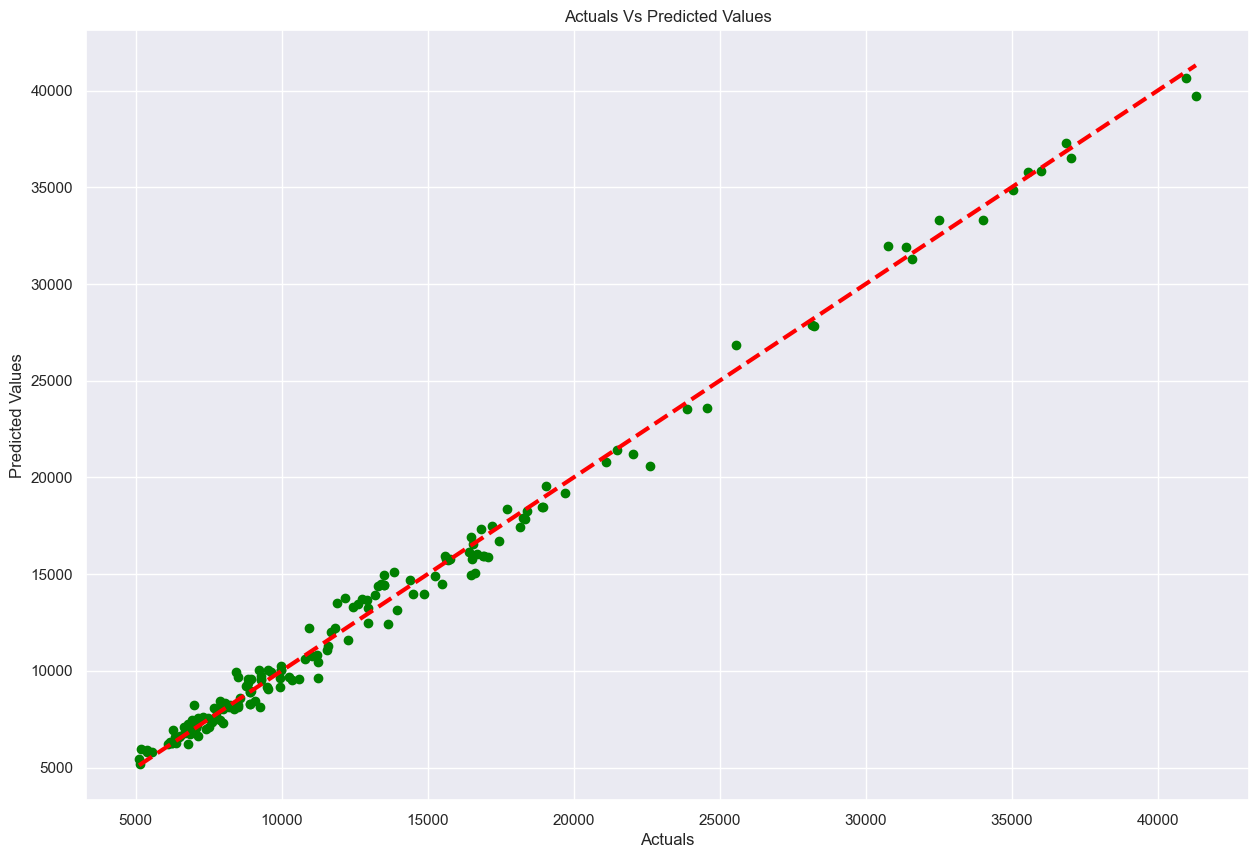

In [78]:
# Plotting Actuals Vs Predicted

plt.figure(figsize=(15,10))

plt.scatter(y_train, y_pred, c='green')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', c='red', lw=3)
plt.xlabel('Actuals')
plt.ylabel('Predicted Values')
plt.title('Actuals Vs Predicted Values')


In [79]:
X_train

array([[0.000000, 102.000000, 191.700000, ..., 0.000000, 0.000000,
        1.000000],
       [2.000000, 97.300000, 171.700000, ..., 0.000000, 0.000000,
        1.000000],
       [0.000000, 97.200000, 172.000000, ..., 0.000000, 0.000000,
        1.000000],
       ...,
       [2.000000, 99.100000, 186.600000, ..., 0.000000, 0.000000,
        1.000000],
       [2.000000, 93.300000, 157.300000, ..., 0.000000, 0.000000,
        1.000000],
       [-1.000000, 109.100000, 188.800000, ..., 0.000000, 0.000000,
        1.000000]])

In [92]:
# Fixing the train df
final_df = pd.DataFrame(X_train, columns = X_columns.columns)
final_df['Price'] = y_train.values
final_df['Phase'] = 'Existing data'
final_df['Price Predictions'] = y_pred
print(final_df.shape)
final_df

final_df2 = pd.DataFrame(X_test, columns = X_columns.columns)
final_df2['Price'] = y_test.values
final_df2['Phase'] = 'New unseen data'
final_df2['Price Predictions'] = reg.predict(X_test)
print(final_df2.shape)
final_df2

# unioning them
final_df3 = pd.concat([final_df, final_df2], ignore_index = True)
print(final_df3.shape)
final_df3.head()




(164, 50)
(41, 50)
(205, 50)


car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0    50.0        0.0      102.0      191.7      70.6       47.8      3950.0   
1   189.0        2.0       97.3      171.7      65.5       55.7      2300.0   
2   143.0        0.0       97.2      172.0      65.4       52.5      2190.0   
3    56.0        3.0       95.3      169.0      65.7       49.6      2380.0   
4   167.0        1.0       94.5      168.7      64.0       52.6      2300.0   

   cylindernumber  enginesize  boreratio  stroke  compressionratio  \
0            12.0       326.0       3.54   2.760              11.5   
1             4.0       109.0       3.19   3.400              10.0   
2             4.0       108.0       3.62   2.640               9.5   
3             2.0        70.0       3.33   3.255               9.4   
4             4.0        98.0       3.24   3.080               9.4   

   horsepower  peakrpm  citympg  highwaympg  carbody_convertible  \
0       262.0   5000.0     13.0        17.0                  0.0   
1       100.0   5500.0     26.0        32.0                  0.0   
2        82.0   4400.0     28.0        33.0                  0.0   
3       101.0   6000.0     17.0        23.0                  0.0   
4       112.0   6600.0     26.0        29.0                  0.0   

   carbody_hardtop  carbody_hatchback  carbody_sedan  carbody_wagon  \
0              0.0                0.0            1.0            0.0   
1              0.0                0.0            1.0            0.0   
2              0.0                0.0            1.0            0.0   
3              0.0                1.0            0.0            0.0   
4              0.0                1.0            0.0            0.0   

   aspiration_std  aspiration_turbo  doornumber_four  doornumber_two  \
0             1.0               0.0              0.0             1.0   
1             1.0               0.0              1.0             0.0   
2             1.0               0.0              1.0             0.0   
3             1.0               0.0              0.0             1.0   
4             1.0               0.0              0.0             1.0   

   drivewheel_4wd  drivewheel_fwd  drivewheel_rwd  enginelocation_front  \
0             0.0             0.0             1.0                   1.0   
1             0.0             1.0             0.0                   1.0   
2             0.0             1.0             0.0                   1.0   
3             0.0             0.0             1.0                   1.0   
4             0.0             0.0             1.0                   1.0   

   enginelocation_rear  fuelsystem_1bbl  fuelsystem_2bbl  fuelsystem_4bbl  \
0                  0.0              0.0              0.0              0.0   
1                  0.0              0.0              0.0              0.0   
2                  0.0              0.0              1.0              0.0   
3                  0.0              0.0              0.0              1.0   
4                  0.0              0.0              0.0              0.0   

   fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  \
0             0.0             0.0              1.0              0.0   
1             0.0             0.0              1.0              0.0   
2             0.0             0.0              0.0              0.0   
3             0.0             0.0              0.0              0.0   
4             0.0             0.0              1.0              0.0   

   fuelsystem_spfi  enginetype_dohc  enginetype_dohcv  enginetype_l  \
0              0.0              0.0               0.0           0.0   
1              0.0              0.0               0.0           0.0   
2              0.0              0.0               0.0           0.0   
3              0.0              0.0               0.0           0.0   
4              0.0              1.0               0.0           0.0   

   enginetype_ohc  enginetype_ohcf  enginetype_ohcv  enginetype_rotor 

In [93]:
# Left Joining to the original dataset the predictions
car_raw_data['car_ID'] = car_raw_data['car_ID'].astype(int)
final_df3['car_ID'] = final_df3['car_ID'].astype(int)

In [94]:
final_df4 = car_raw_data.merge(final_df3[['car_ID','Phase','Price Predictions']], how = 'left', on = 'car_ID')
final_df4['CarName'] = final_df4['CarName'] + ' - ' + final_df4['car_ID'].astype(str)
print(final_df4.shape)
final_df4.head()

(205, 28)


car_ID  symboling                       CarName fueltype aspiration  \
0       1          3        alfa-romero giulia - 1      gas        std   
1       2          3       alfa-romero stelvio - 2      gas        std   
2       3          1  alfa-romero Quadrifoglio - 3      gas        std   
3       4          2               audi 100 ls - 4      gas        std   
4       5          2                audi 100ls - 5      gas        std   

  doornumber      carbody drivewheel enginelocation  wheelbase  carlength  \
0        two  convertible        rwd          front       88.6      168.8   
1        two  convertible        rwd          front       88.6      168.8   
2        two    hatchback        rwd          front       94.5      171.2   
3       four        sedan        fwd          front       99.8      176.6   
4       four        sedan        4wd          front       99.4      176.6   

   carwidth  carheight  curbweight enginetype cylindernumber  enginesize  \
0      64.1       48.8        2548       dohc           four         130   
1      64.1       48.8        2548       dohc           four         130   
2      65.5       52.4        2823       ohcv            six         152   
3      66.2       54.3        2337        ohc           four         109   
4      66.4       54.3        2824        ohc           five         136   

  fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0       mpfi       3.47    2.68               9.0         111     5000   
1       mpfi       3.47    2.68               9.0         111     5000   
2       mpfi       2.68    3.47               9.0         154     5000   
3       mpfi       3.19    3.40              10.0         102     5500   
4       mpfi       3.19    3.40               8.0         115     5500   

   citympg  highwaympg    price            Phase  Price Predictions  
0       21          27  13495.0    Existing data       14030.631995  
1       21          27  16500.0    Existing data       15868.214832  
2       19          26  16500.0  New unseen data       16644.131234  
3       24          30  13950.0    Existing data       13923.215678  
4       18          22  17450.0    Existing data       17130.875554

In [98]:
#Exporting the data into a csv  file

final_df4.to_csv('C:\\Users\\user\\Desktop\\Evarcity\\Predicted_Car_Price_model.csv',index=False)


